## Different Survey and Literature Comaprsion

Literature data 'bhatt_sigmagsr_kg_combined.csv' loaded successfully.
Literature data 'bhatt_sigmagsr_bhb_combined.csv' loaded successfully.
Literature data 'battaglia_et_al_combined.csv' loaded successfully.
Literature data 'deason_et_al_combined.csv' loaded successfully.
Literature data 'kafle_et_al_bhb_combined.csv' loaded successfully.
Literature data 'giants_combined.csv' loaded successfully.
Literature data 'bhatt_sigmagsr_hg_combined.csv' loaded successfully.
Data loaded successfully. Surveys found: ['RGB' 'BHB' 'DESI' 'BOSS_HALO+LAMOST_VMP' 'VARIABLE_STARS']

--- Analyzing Survey: RGB ---
Applied radial cuts: 194 -> 174 data points.
  - Applying custom re-binning for sigma_gsr with config: [(10, 30, 50), (30, 50, 10), (50, 250, 30)]

--- Analyzing Survey: BHB ---
Applied radial cuts: 255 -> 161 data points.
  - Applying custom re-binning for sigma_gsr with config: [(10, 50, 75), (50, 100, 15), (100, 250, 3)]

--- Analyzing Survey: DESI ---
Applied radial cuts: 318 -> 126 data p

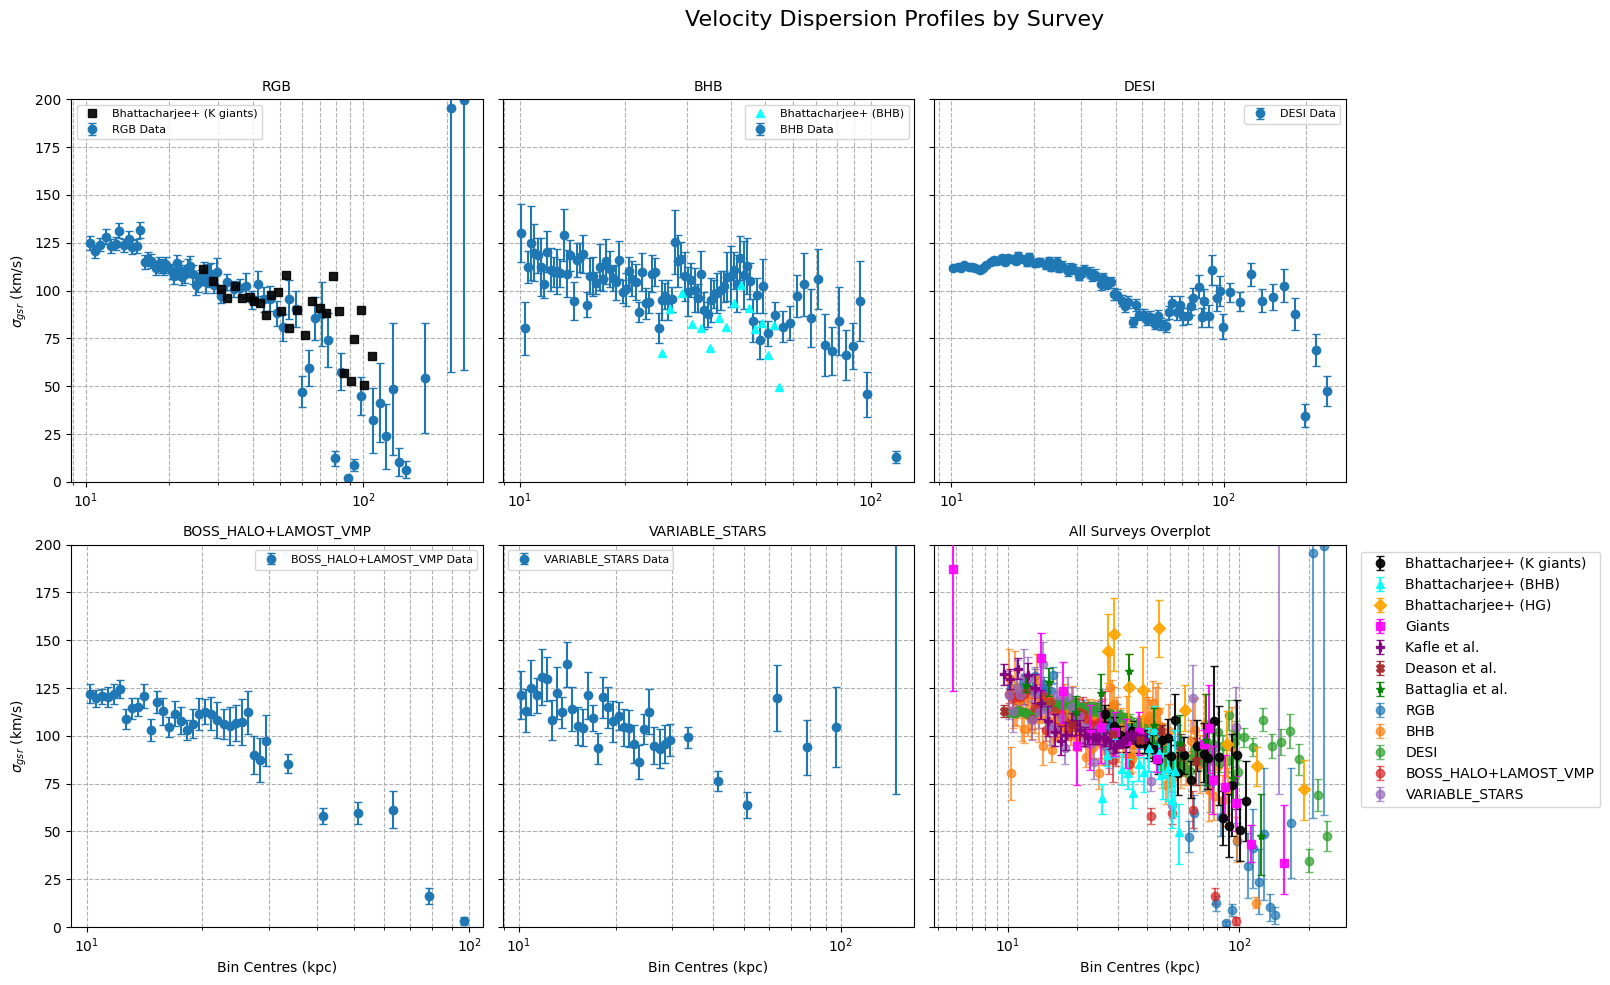

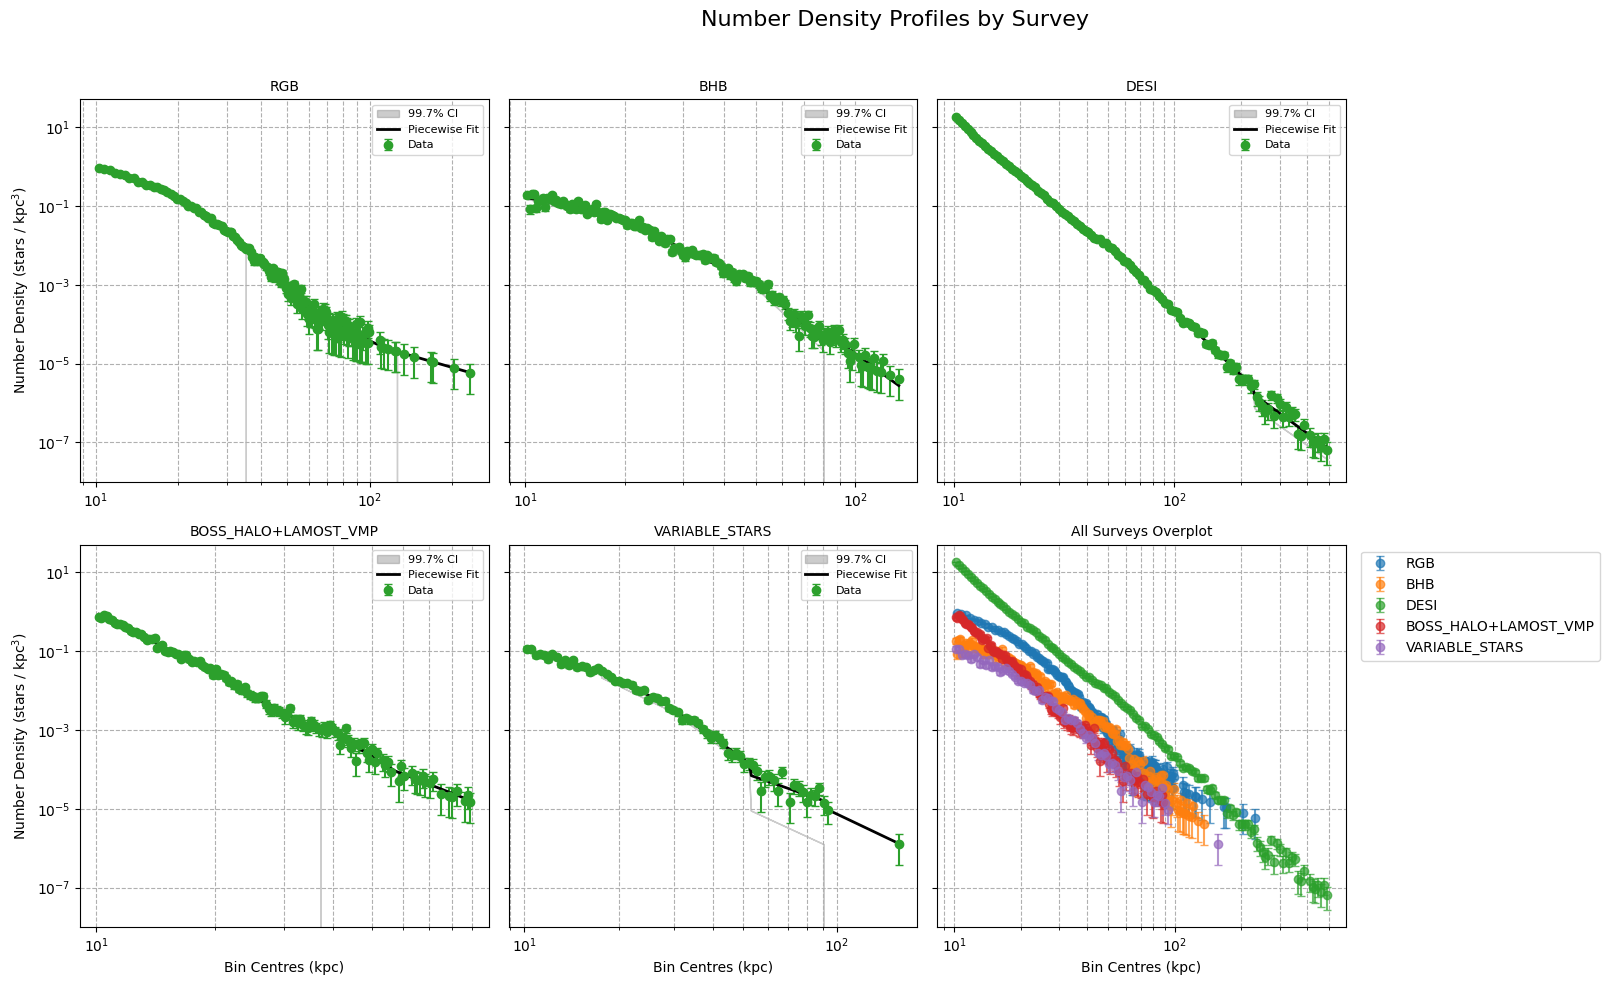


                  ANALYSIS & RESULTS SUMMARY

--- Model Configuration ---
Radial Range:                  10.0 - 500.0 kpc
Number Density Model:
  - Fit:                       Piecewise Power-Law
  - Regions:                   5
Velocity Dispersion Model:
  - Filter:                    Weighted Savitzky-Golay
  - Window Size:               3
  - Polynomial Order:          2
Error Estimation:
  - Method:                    Monte Carlo
  - Simulations:               1000

--- Fit & Re-binning Details ---
  Survey: RGB
    - Re-binning Config:     [(10, 30, 50), (30, 50, 10), (50, 250, 30)]
    - Number Density Slopes (γ):
      - Region 1: -2.518 ± 0.057
      - Region 2: -4.841 ± 0.085
      - Region 3: -6.767 ± 0.178
      - Region 4: -3.224 ± 0.398
      - Region 5: -2.000 ± 0.000
  Survey: BHB
    - Re-binning Config:     [(10, 50, 75), (50, 100, 15), (100, 250, 3)]
    - Number Density Slopes (γ):
      - Region 1: -1.620 ± 0.277
      - Region 2: -3.926 ± 0.205
      - Region 3: -3

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import warnings

warnings.filterwarnings('ignore')

class SurveyAnalyzer:
    """
    A class to analyze survey data, inspired by a professional astrophysics pipeline.

    Handles loading, dynamic and survey-specific re-binning, processing, and plotting.
    """

    def __init__(self, filepath):
        """Initializes the analyzer by loading and preparing the data."""
        self.df = self._load_and_prepare_data(filepath)
        self.lit_df_kg, self.lit_df_bhb, self.lit_df_hg, self.lit_df_gia, self.lit_df_kaf, self.lit_df_dea, self.lit_df_bat = self._load_literature_data()
        if self.df is not None:
            self.surveys = self.df['survey'].unique()
            print(f"Data loaded successfully. Surveys found: {self.surveys}")
            self.survey_data = {}
            self.run_params = {}

    def _load_literature_data(self):
        """Loads literature data for comparison plots (without errors)."""
        df_kg, df_bhb, df_bat, df_hg, df_dea, df_kaf, df_gia = None, None, None, None, None, None, None
        try:
            # Assuming columns are 'r' and 'sigma_gsr'
            df_kg = pd.read_csv('bhatt_sigmagsr_kg_combined.csv')
            print("Literature data 'bhatt_sigmagsr_kg_combined.csv' loaded successfully.")
        except FileNotFoundError:
            print("Warning: Literature data file 'bhatt_sigmagsr_kg_combined.csv' not found. Skipping.")
        except Exception as e:
            print(f"Error loading 'bhatt_sigmagsr_kg_combined.csv': {e}. Skipping.")

        try:
            # Assuming columns are 'r' and 'sigma_gsr'
            df_bhb = pd.read_csv('bhatt_sigmagsr_bhb_combined.csv')
            print("Literature data 'bhatt_sigmagsr_bhb_combined.csv' loaded successfully.")
        except FileNotFoundError:
            print("Warning: Literature data file 'bhatt_sigmagsr_bhb_combined.csv' not found. Skipping.")
        except Exception as e:
            print(f"Error loading 'bhatt_sigmagsr_bhb_combined.csv': {e}. Skipping.")

        try:
            # Assuming columns are 'r' and 'sigma_gsr'
            df_bat = pd.read_csv('battaglia_et_al_combined.csv')
            print("Literature data 'battaglia_et_al_combined.csv' loaded successfully.")
        except FileNotFoundError:
            print("Warning: Literature data file 'battaglia_et_al_combined.csv' not found. Skipping.")
        except Exception as e:
            print(f"Error loading 'battaglia_et_al_combined.csv': {e}. Skipping.")

        try:
            df_dea = pd.read_csv('deason_et_al_combined.csv')
            print("Literature data 'deason_et_al_combined.csv' loaded successfully.")
        except FileNotFoundError:
            print("Warning: Literature data file 'deason_et_al_combined.csv' not found. Skipping.")
        except Exception as e:
            print(f"Error loading 'deason_et_al_combined.csv': {e}. Skipping.")

        try:
            df_kaf = pd.read_csv('kafle_et_al_bhb_combined.csv')
            print("Literature data 'kafle_et_al_bhb_combined.csv' loaded successfully.")
        except FileNotFoundError:
            print("Warning: Literature data file 'kafle_et_al_bhb_combined.csv' not found. Skipping.")
        except Exception as e:
            print(f"Error loading 'kafle_et_al_bhb_combined.csv': {e}. Skipping.")

        try:
            df_gia = pd.read_csv('giants_combined.csv')
            print("Literature data 'giants_combined.csv' loaded successfully.")
        except FileNotFoundError:
            print("Warning: Literature data file 'giants_combined.csv' not found. Skipping.")
        except Exception as e:
            print(f"Error loading 'giants_combined.csv': {e}. Skipping.")

        try:
            # Assuming columns are 'r' and 'sigma_gsr'
            df_hg = pd.read_csv('bhatt_sigmagsr_hg_combined.csv')
            print("Literature data 'bhatt_sigmagsr_hg_combined.csv' loaded successfully.")
        except FileNotFoundError:
            print("Warning: Literature data file 'bhatt_sigmagsr_hg_combined.csv' not found. Skipping.")
        except Exception as e:
            print(f"Error loading 'bhatt_sigmagsr_hg_combined.csv': {e}. Skipping.")
    
        # try:
        #     df_brown = pd.read_csv('brown_et_al.csv')
        #     print("Literature data 'brown_et_al.csv' loaded successfully.")
        # except FileNotFoundError:
        #     print("Warning: Literature data file 'brown_et_al.csv' not found. Skipping.")
        # except Exception as e:
        #     print(f"Error loading 'brown_et_al.csv': {e}. Skipping.")

        return df_kg, df_bhb, df_hg, df_gia, df_kaf, df_dea , df_bat

    def _load_and_prepare_data(self, filepath):
        """Loads, cleans, and validates the input CSV file."""
        try:
            df = pd.read_csv(filepath, header=0, encoding='latin1')
            df.columns = df.columns.str.strip()
            rename_map = {
                'Bin_center': 'bin_centres', 'sgsr': 'sigma_gsr',
                'x_low': 'bin_edge_lower', 'x_up': 'bin_edge_upper',
                'Counts': 'counts', 'e_gsr': 'sigma_gsr_error',
                'Survey': 'survey'
            }
            df.rename(columns=rename_map, inplace=True)
            numeric_cols = [
                'bin_centres', 'sigma_gsr', 'bin_edge_lower',
                'bin_edge_upper', 'counts', 'sigma_gsr_error'
            ]
            for col in numeric_cols:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            df.dropna(subset=numeric_cols, inplace=True)
            return df
        except FileNotFoundError:
            print(f"Error: The file '{filepath}' was not found.")
            return None
        except Exception as e:
            print(f"An error occurred during data loading: {e}")
            return None

    def _generate_bin_edges(self, rebin_config):
        """Generates a final set of bin edges from a configuration list."""
        all_edges = []
        for (start, end, num_bins) in rebin_config:
            edges = np.logspace(np.log10(start), np.log10(end), num_bins + 1)
            all_edges.append(edges)
        return np.unique(np.concatenate(all_edges))

    def _rebin_data(self, df, bin_edges):
        """Re-bins the dataframe into larger bins using a weighted average for sigma_gsr."""
        new_bins = []
        for i in range(len(bin_edges) - 1):
            low, high = bin_edges[i], bin_edges[i+1]
            sub_df = df[(df['bin_centres'] >= low) & (df['bin_centres'] < high)]
            
            if len(sub_df) == 0: continue

            weights = 1.0 / (sub_df['sigma_gsr_error']**2 + 1e-9)
            if np.sum(weights) == 0: continue
            
            avg_sigma_gsr = np.sum(sub_df['sigma_gsr'] * weights) / np.sum(weights)
            err_sigma_gsr = 1.0 / np.sqrt(np.sum(weights))
            
            new_bins.append({
                'bin_centres': (low + high) / 2.0,
                'sigma_gsr': avg_sigma_gsr,
                'sigma_gsr_error': err_sigma_gsr,
            })
        return pd.DataFrame(new_bins)

    def _calculate_number_density(self, df):
        """Calculates number density and its Poissonian error."""
        volume = (4/3) * np.pi * (df['bin_edge_upper']**3 - df['bin_edge_lower']**3)
        df['number_density'] = df['counts'] / volume
        df['number_density_error'] = np.sqrt(df['counts']) / volume
        return df

    def _power_law(self, x, a, b):
        """A simple power-law function for fitting."""
        return a * np.power(x, b)

    def _fit_piecewise_power_law(self, r, values, errors, n_regions=3):
        """Fits power laws to different regions of the data."""
        valid_mask = ~np.isnan(values) & (values > 0) & ~np.isnan(errors)
        r_valid, v_valid, e_valid = r[valid_mask], values[valid_mask], errors[valid_mask]
        if len(r_valid) < 4: return None, None
        log_r = np.log10(r_valid)
        boundaries = np.linspace(log_r.min(), log_r.max(), n_regions + 1)
        fit_params, fit_covs = [], []
        for i in range(n_regions):
            mask = (log_r >= boundaries[i]) & (log_r <= boundaries[i+1])
            if np.sum(mask) >= 2:
                try:
                    popt, pcov = curve_fit(self._power_law, r_valid[mask], v_valid[mask], sigma=e_valid[mask], maxfev=5000)
                    fit_params.append(popt); fit_covs.append(pcov)
                except RuntimeError:
                    fit_params.append([np.nan, np.nan]); fit_covs.append(np.full((2, 2), np.nan))
            else:
                fit_params.append([np.nan, np.nan]); fit_covs.append(np.full((2, 2), np.nan))
        def piecewise_func(x):
            log_x = np.log10(x); result = np.zeros_like(x, dtype=float)
            for i, params in enumerate(fit_params):
                if not np.isnan(params[0]):
                    if i == 0: mask = log_x <= boundaries[i+1]
                    elif i == n_regions-1: mask = log_x > boundaries[i]
                    else: mask = (log_x > boundaries[i]) & (log_x <= boundaries[i+1])
                    result[mask] = self._power_law(x[mask], *params)
            return result
        return piecewise_func, (boundaries, fit_params, fit_covs)

    def _generate_fit_realizations(self, fit_info, n_sims=500):
        """Generates plausible fit functions based on fitting uncertainty."""
        boundaries, fit_params, fit_covs = fit_info
        realizations = []
        for _ in range(n_sims):
            sim_params = []
            for p, c in zip(fit_params, fit_covs):
                if not np.isnan(p[0]) and not np.any(np.isnan(c)):
                    try:
                        c_stable = c if np.all(np.linalg.eigvals(c) >= 0) else np.diag(np.abs(np.diag(c)))
                        sim_p = np.random.multivariate_normal(p, c_stable)
                        sim_params.append(sim_p)
                    except np.linalg.LinAlgError:
                        sim_params.append([np.nan, np.nan])
                else:
                    sim_params.append([np.nan, np.nan])
            def single_realization(x):
                log_x = np.log10(x); res = np.zeros_like(x, dtype=float)
                for i, params in enumerate(sim_params):
                    if not np.isnan(params[0]):
                        if i == 0: mask = log_x <= boundaries[i+1]
                        elif i == len(sim_params)-1: mask = log_x > boundaries[i]
                        else: mask = (log_x > boundaries[i]) & (log_x <= boundaries[i+1])
                        res[mask] = self._power_law(x[mask], *params)
                return res
            realizations.append(single_realization)
        return realizations

    def _fit_weighted_savgol(self, y, window_length, polyorder, errors):
        """Performs a weighted Savitzky-Golay filter."""
        half_window = window_length // 2
        smoothed_y = np.zeros_like(y)
        for i in range(len(y)):
            start, end = max(0, i - half_window), min(len(y), i + half_window + 1)
            window_y, window_err = y[start:end], errors[start:end]
            x = np.arange(len(window_y))
            weights = 1.0 / (window_err**2 + 1e-9)
            try:
                coeffs = np.polyfit(x, window_y, polyorder, w=weights)
                smoothed_y[i] = np.polyval(coeffs, i - start)
            except (np.linalg.LinAlgError, TypeError):
                smoothed_y[i] = y[i]
        return smoothed_y

    def run_full_analysis(self, r_min=None, r_max=None, n_density_regions=3, sg_window=7, sg_poly=2, n_sims=500, survey_rebin_configs=None):
        """Runs the analysis pipeline with survey-specific re-binning configurations."""
        if self.df is None: return
        self.run_params = locals()
            
        for survey in self.surveys:
            print(f"\n--- Analyzing Survey: {survey} ---")
            survey_df = self.df[self.df['survey'] == survey].copy().sort_values('bin_centres')
            
            initial_count = len(survey_df)
            if r_min is not None: survey_df = survey_df[survey_df['bin_centres'] >= r_min]
            if r_max is not None: survey_df = survey_df[survey_df['bin_centres'] <= r_max]
            
            if len(survey_df) == 0: continue
            print(f"Applied radial cuts: {initial_count} -> {len(survey_df)} data points.")
            
            # --- SIGMA GSR ANALYSIS (WITH SURVEY-SPECIFIC REBINNING) ---
            sigma_df = survey_df
            if survey_rebin_configs and survey in survey_rebin_configs:
                rebin_config = survey_rebin_configs[survey]
                print(f"  - Applying custom re-binning for sigma_gsr with config: {rebin_config}")
                rebin_edges = self._generate_bin_edges(rebin_config)
                sigma_df = self._rebin_data(survey_df, rebin_edges)
            else:
                print("  - No custom re-binning config for sigma_gsr. Using original binning.")

            valid_s = (sigma_df['sigma_gsr'] > 0) & (sigma_df['sigma_gsr_error'] > 0)
            if len(sigma_df[valid_s]) < sg_window:
                print(f"  - Not enough data points ({len(sigma_df[valid_s])}) to apply SG filter. Skipping survey.")
                continue
                
            sg_fit = self._fit_weighted_savgol(sigma_df['sigma_gsr'][valid_s].to_numpy(), window_length=sg_window, polyorder=sg_poly, errors=sigma_df['sigma_gsr_error'][valid_s].to_numpy())
            sg_interp = interp1d(sigma_df['bin_centres'][valid_s], sg_fit, kind='cubic', fill_value="extrapolate")
            
            sg_sims = []
            for _ in range(n_sims):
                sim_sigma = np.random.normal(loc=sigma_df['sigma_gsr'][valid_s], scale=sigma_df['sigma_gsr_error'][valid_s])
                sim_fit = self._fit_weighted_savgol(sim_sigma, sg_window, sg_poly, sigma_df['sigma_gsr_error'][valid_s])
                sg_sims.append(sim_fit)
            
            # --- NUMBER DENSITY ANALYSIS (ALWAYS USES ORIGINAL BINNING) ---
            density_df = self._calculate_number_density(survey_df)
            valid_n = (density_df['number_density'] > 0) & (density_df['number_density_error'] > 0)
            n_func, n_info = self._fit_piecewise_power_law(density_df['bin_centres'][valid_n], density_df['number_density'][valid_n], density_df['number_density_error'][valid_n], n_regions=n_density_regions)
            n_realizations = self._generate_fit_realizations(n_info, n_sims) if n_info else []
            
            self.survey_data[survey] = {
                'sigma_df': sigma_df, 'density_df': density_df,
                'valid_s': valid_s, 'valid_n': valid_n,
                'n_func': n_func, 'n_info': n_info, 'n_realizations': n_realizations,
                'sg_interp': sg_interp, 'sg_sims': np.array(sg_sims)
            }
        
        self._create_summary_figures()
        self.print_summary()

    def _plot_single_sigma_gsr(self, ax, survey):
        """
        Plots the velocity dispersion analysis for one survey on a given axis.
        Now includes specific literature data for 'RGB' and 'BHB' surveys.
        """
        data = self.survey_data[survey]
        df, valid_s = data['sigma_df'], data['valid_s']
        
        # Plot the survey's main data
        ax.errorbar(df['bin_centres'], df['sigma_gsr'], yerr=df['sigma_gsr_error'], fmt='o', capsize=3, label=f'{survey} Data', color='C0')
        
        # Overplot literature data for specific surveys, using corrected attribute names.
        if survey == 'RGB' and self.lit_df_kg is not None:
            ax.plot(self.lit_df_kg['r'], self.lit_df_kg['sigma_gsr'],
                    marker='s', linestyle='none', label='Bhattacharjee+ (K giants)', 
                    color='black', alpha=0.9, zorder=10)

        if survey == 'BHB' and self.lit_df_bhb is not None:
            ax.plot(self.lit_df_bhb['r'], self.lit_df_bhb['sigma_gsr'],
                    marker='^', linestyle='none', label='Bhattacharjee+ (BHB)', 
                    color='cyan', alpha=0.9, zorder=10)

        # Uncomment the lines below to show fit and confidence intervals
        # r_fit = np.logspace(np.log10(df['bin_centres'][valid_s].min()), np.log10(df['bin_centres'][valid_s].max()), 200)
        # lower, upper = np.percentile(data['sg_sims'], [0.15, 99.85], axis=0)
        # ax.fill_between(df['bin_centres'][valid_s], lower, upper, color='gray', alpha=0.4, label='99.7% CI')
        # ax.plot(r_fit, data['sg_interp'](r_fit), 'k-', lw=2, label='Weighted SG Fit')
        
        ax.set_title(survey, fontsize=10)
        ax.legend(loc='best', fontsize=8)
        ax.set_xscale('log')
        ax.set_ylim(0, 200)
        ax.grid(True, which='both', ls='--')

    def _plot_single_number_density(self, ax, survey):
        """Plots the number density analysis for one survey, including fit summary."""
        data = self.survey_data[survey]
        df, valid_n = data['density_df'], data['valid_n']
        r_fit = np.logspace(np.log10(df['bin_centres'][valid_n].min()), np.log10(df['bin_centres'][valid_n].max()), 200)

        ax.errorbar((df['bin_centres'][valid_n]), df['number_density'][valid_n], yerr=df['number_density_error'][valid_n], fmt='o', capsize=3, label='Data', color='C2')
        if data['n_func']:
            n_fit_evals = np.array([f(r_fit) for f in data['n_realizations']])
            lower, upper = np.percentile(n_fit_evals, [0.15, 99.85], axis=0)
            ax.fill_between(r_fit, lower, upper, color='gray', alpha=0.4, label='99.7% CI')
            ax.plot(r_fit, data['n_func'](r_fit), 'k-', lw=2, label='Piecewise Fit')
        
        ax.set_title(survey, fontsize=10)
        ax.legend(loc='best', fontsize=8)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.grid(True, which='both', ls='--')

    def _create_summary_figures(self):
        """Creates two 2x3 summary figures for all surveys and analyses."""
        if not self.survey_data:
            return
        
        surveys_to_plot = list(self.survey_data.keys())

        # --- Figure 1: Velocity Dispersion Profiles ---
        fig1, axes1 = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
        fig1.suptitle('Velocity Dispersion Profiles by Survey', fontsize=16)
        axes_flat1 = axes1.flatten()
        
        for i, survey in enumerate(surveys_to_plot):
            if i < 5:
                self._plot_single_sigma_gsr(axes_flat1[i], survey)
        
        ax_over1 = axes_flat1[5]

        # --- START: Integrated Literature Data Plotting ---
        
        # Create a dictionary to easily access data attributes by key.
        literature_datasets = {
            'kg': self.lit_df_kg,
            'bhb': self.lit_df_bhb,
            'hg': self.lit_df_hg,
            'gia': self.lit_df_gia,
            'kaf': self.lit_df_kaf,
            'dea': self.lit_df_dea,
            'bat': self.lit_df_bat,
        }

        # Configuration list to drive plotting.
        plot_configs = [
            {'key': 'kg', 'label': 'Bhattacharjee+ (K giants)', 'color': 'black', 'marker': 'o', 'has_errors': True},
            {'key': 'bhb', 'label': 'Bhattacharjee+ (BHB)', 'color': 'cyan', 'marker': '^', 'has_errors': True},
            {'key': 'hg', 'label': 'Bhattacharjee+ (HG)', 'color': 'orange', 'marker': 'D', 'has_errors': True},
            {'key': 'gia', 'label': 'Giants', 'color': 'magenta', 'marker': 's', 'has_errors': True},
            {'key': 'kaf', 'label': 'Kafle et al.', 'color': 'purple', 'marker': 'P', 'has_errors': True},
            {'key': 'dea', 'label': 'Deason et al.', 'color': 'brown', 'marker': 'X', 'has_errors': True},
            {'key': 'bat', 'label': 'Battaglia et al.', 'color': 'green', 'marker': '*', 'has_errors': True},
        ]

        # Loop through configurations and plot each dataset.
        for config in plot_configs:
            try:
                data = literature_datasets.get(config['key'])
                if data is not None:
                    if config['has_errors'] and all(col in data.columns for col in ['sigma_gsr_lower_bound', 'sigma_gsr_upper_bound']):
                        y_error = [data['sigma_gsr'] - data['sigma_gsr_lower_bound'], data['sigma_gsr_upper_bound'] - data['sigma_gsr']]
                        ax_over1.errorbar(data['r'], data['sigma_gsr'], yerr=y_error, fmt=config['marker'],
                                          capsize=3, label=config['label'], color=config['color'], alpha=0.9, zorder=10, linestyle='none')
                    else:
                        ax_over1.plot(data['r'], data['sigma_gsr'], marker=config['marker'],
                                      linestyle='none', label=config['label'], color=config['color'], alpha=0.9, zorder=10)
            except Exception as e:
                print(f"Warning: Could not plot data for '{config['label']}'. Reason: {e}")

        # --- END: Integrated Literature Data Plotting ---

        # Overplot all survey data.
        for i, survey in enumerate(surveys_to_plot):
            ax_over1.errorbar(self.survey_data[survey]['sigma_df']['bin_centres'], self.survey_data[survey]['sigma_df']['sigma_gsr'],
                              yerr=self.survey_data[survey]['sigma_df']['sigma_gsr_error'],
                              fmt='o', capsize=3, label=survey, color=f'C{i}', alpha=0.7)
        
        ax_over1.set_title("All Surveys Overplot", fontsize=10)
        ax_over1.set_xscale('log')
        ax_over1.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
        ax_over1.grid(True, which='both', ls='--')
        for ax in axes1[:, 0]: ax.set_ylabel(r'$\sigma_{gsr}$ (km/s)')
        for ax in axes1[1, :]: ax.set_xlabel('Bin Centres (kpc)')
        plt.tight_layout(rect=[0, 0, 0.9, 0.96]) # Adjusted rect to better fit legend
        plt.show()

        # --- Figure 2: Number Density Profiles ---
        fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
        fig2.suptitle('Number Density Profiles by Survey', fontsize=16)
        axes_flat2 = axes2.flatten()
        for i, survey in enumerate(surveys_to_plot):
            if i < 5: self._plot_single_number_density(axes_flat2[i], survey)
        
        ax_over2 = axes_flat2[5]
        for i, survey in enumerate(surveys_to_plot):
            data = self.survey_data[survey]
            df, valid_n = data['density_df'], data['valid_n']
            ax_over2.errorbar(df['bin_centres'][valid_n], df['number_density'][valid_n],
                              yerr=df['number_density_error'][valid_n],
                              fmt='o', capsize=3, label=survey, color=f'C{i}', alpha=0.7)
        
        ax_over2.set_title("All Surveys Overplot", fontsize=10)
        ax_over2.set_xscale('log'); ax_over2.set_yscale('log')
        ax_over2.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
        ax_over2.grid(True, which='both', ls='--')
        for ax in axes2[:, 0]: ax.set_ylabel(r'Number Density (stars / kpc$^3$)')
        for ax in axes2[1, :]: ax.set_xlabel('Bin Centres (kpc)')
        plt.tight_layout(rect=[0, 0, 0.9, 0.96]) # Adjusted rect
        plt.show()

    def print_summary(self):
        """Prints a comprehensive text summary of the analysis run."""
        p = self.run_params
        print("\n" + "="*60)
        print(" " * 18 + "ANALYSIS & RESULTS SUMMARY")
        print("="*60)
        print("\n--- Model Configuration ---")
        print(f"Radial Range:                  {p.get('r_min', 'N/A')} - {p.get('r_max', 'N/A')} kpc")
        print(f"Number Density Model:")
        print(f"  - Fit:                       Piecewise Power-Law")
        print(f"  - Regions:                   {p.get('n_density_regions', 'N/A')}")
        print(f"Velocity Dispersion Model:")
        print(f"  - Filter:                    Weighted Savitzky-Golay")
        print(f"  - Window Size:               {p.get('sg_window', 'N/A')}")
        print(f"  - Polynomial Order:          {p.get('sg_poly', 'N/A')}")
        print(f"Error Estimation:")
        print(f"  - Method:                    Monte Carlo")
        print(f"  - Simulations:               {p.get('n_sims', 'N/A')}")
        
        print("\n--- Fit & Re-binning Details ---")
        for survey, data in self.survey_data.items():
            print(f"  Survey: {survey}")
            # Check if survey was re-binned
            rebin_configs = p.get('survey_rebin_configs')
            if rebin_configs and survey in rebin_configs:
                print(f"    - Re-binning Config:     {rebin_configs[survey]}")
            else:
                print("    - Re-binning Config:     None (used original bins)")
            
            # Print Number Density Slopes
            print("    - Number Density Slopes (γ):")
            if data.get('n_info'):
                _, params, covs = data['n_info']
                for i, (param_vals, cov_matrix) in enumerate(zip(params, covs)):
                    if not np.any(np.isnan(param_vals)) and not np.any(np.isnan(cov_matrix)):
                        slope, err = param_vals[1], np.sqrt(np.diag(cov_matrix))[1]
                        print(f"      - Region {i+1}: {slope:6.3f} ± {err:.3f}")
                    else:
                        print(f"      - Region {i+1}: Fit failed")
            else:
                print("      - No valid fit results.")
        print("="*60)


if __name__ == '__main__':
    FILEPATH = 'seperated_datasets.csv'
    analyzer = SurveyAnalyzer(FILEPATH)
    
    # --- DEFINE SURVEY-SPECIFIC RE-BINNING CONFIGURATIONS ---
    # Format: { 'SurveyName': [(start_kpc, end_kpc, num_bins), ...], ... }
    # Surveys not listed here will use their original binning.
    survey_specific_rebin_configs = {
        'RGB': [
            (10, 30, 50),   
            (30, 50, 10),  
            (50, 250, 30),  
        ],
        'BHB': [
            (10, 50, 75),   
            (50, 100, 15),
            (100, 250, 3)  
        ],
        'VARIABLE_STARS': [
            (10, 30, 30),
            (30, 250, 10)   
        ],
        'DESI': [
            (10, 80, 90),
            (80, 100, 10),
            (100, 250, 10)
        ],
        'BOSS_HALO+LAMOST_VMP': [
            (10, 30, 30),
            (30, 250, 10)
        ]
    }
    
    analyzer.run_full_analysis(
        r_min=10.0,
        r_max=500.0,
        n_density_regions=5,
        sg_window=3,
        sg_poly=2,
        n_sims=1000,
        survey_rebin_configs=survey_specific_rebin_configs
    )



## Power Law fit

Literature data 'bhatt_sigmagsr_kg_combined.csv' loaded successfully.
Literature data 'bhatt_sigmagsr_bhb_combined.csv' loaded successfully.
Literature data 'battaglia_et_al_combined.csv' loaded successfully.
Literature data 'deason_et_al_combined.csv' loaded successfully.
Literature data 'kafle_et_al_bhb_combined.csv' loaded successfully.
Literature data 'giants_combined.csv' loaded successfully.
Literature data 'bhatt_sigmagsr_hg_combined.csv' loaded successfully.
Data loaded successfully. Surveys found: ['RGB' 'BHB' 'DESI' 'BOSS_HALO+LAMOST_VMP' 'VARIABLE_STARS']

--- Analyzing Survey: RGB ---
Applied radial cuts: 194 -> 174 data points.
  - Applying custom re-binning for sigma_gsr with config: [(10, 30, 50), (30, 50, 10), (50, 250, 30)]
  - Performing 1-region power-law fit for sigma_gsr.
  - Performing 5-region power-law fit for number density.

--- Analyzing Survey: BHB ---
Applied radial cuts: 255 -> 161 data points.
  - Applying custom re-binning for sigma_gsr with config: [(10

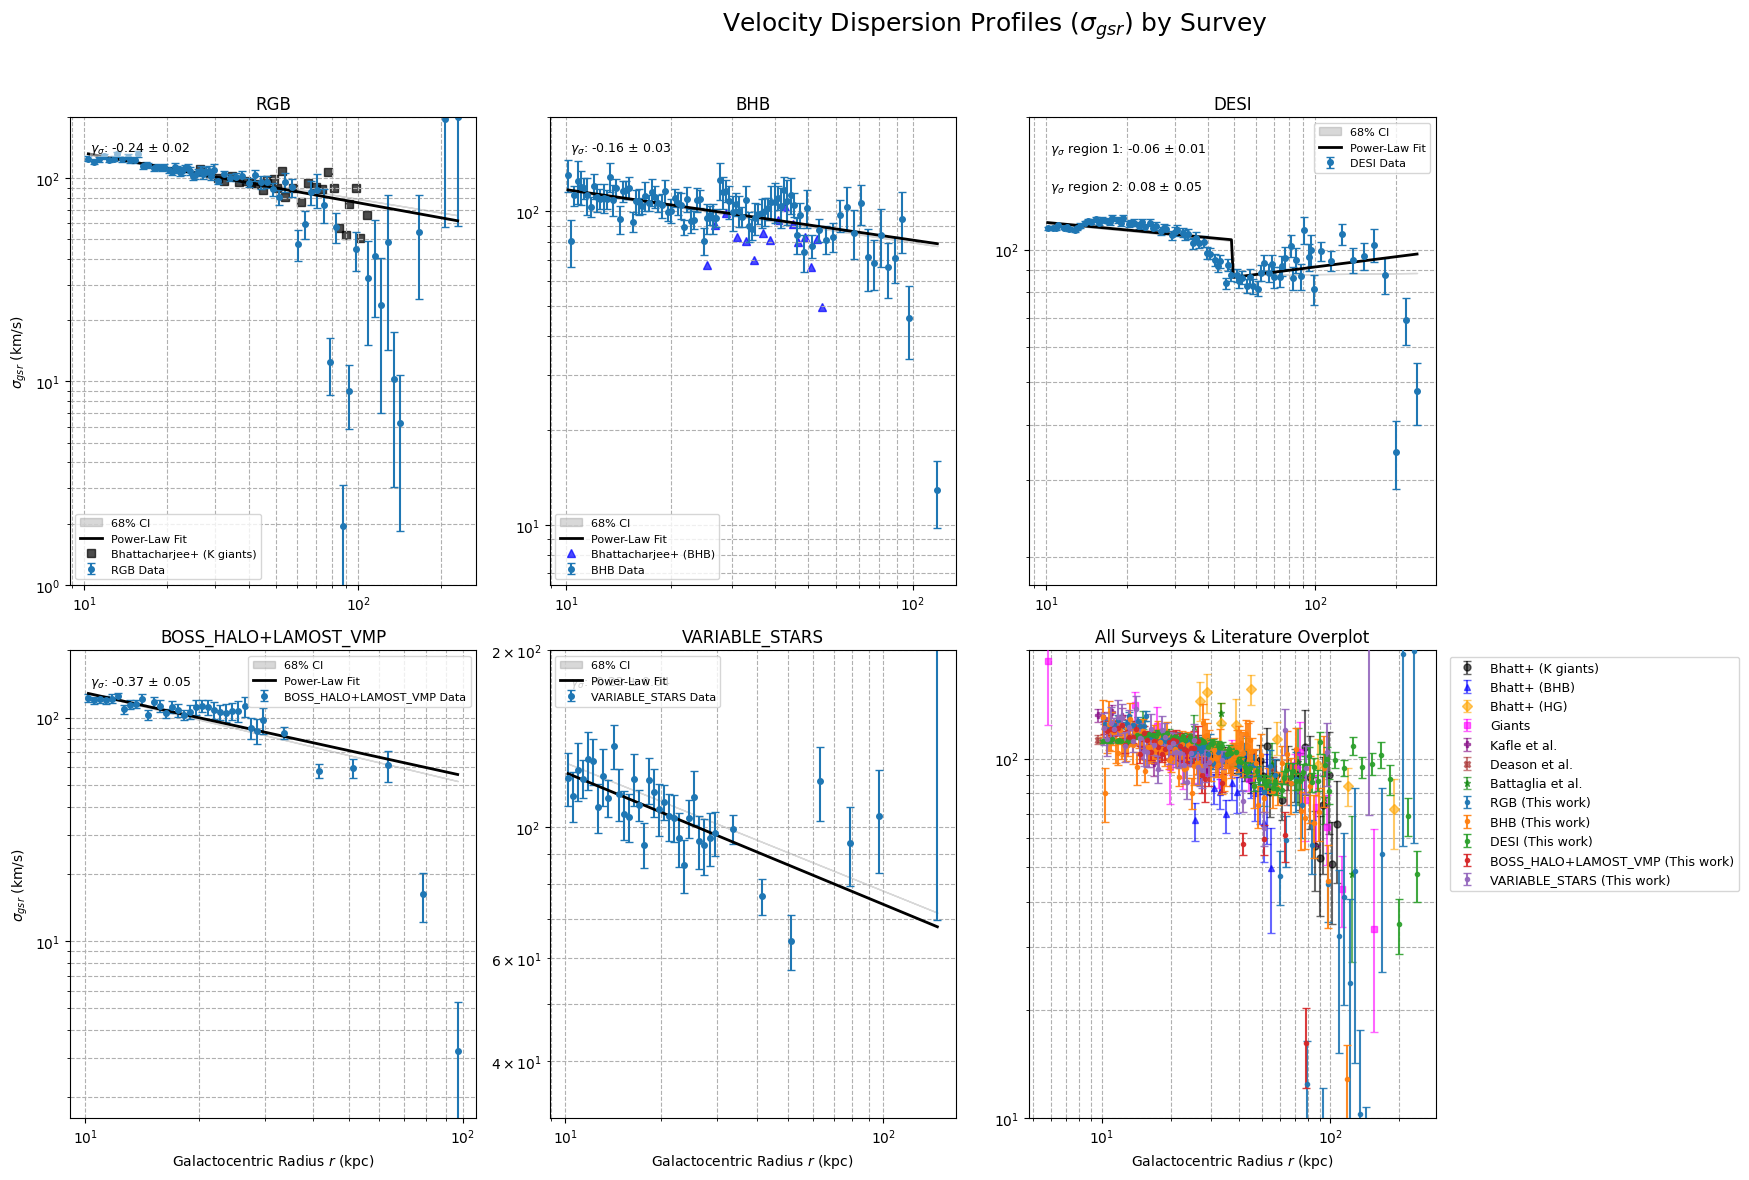

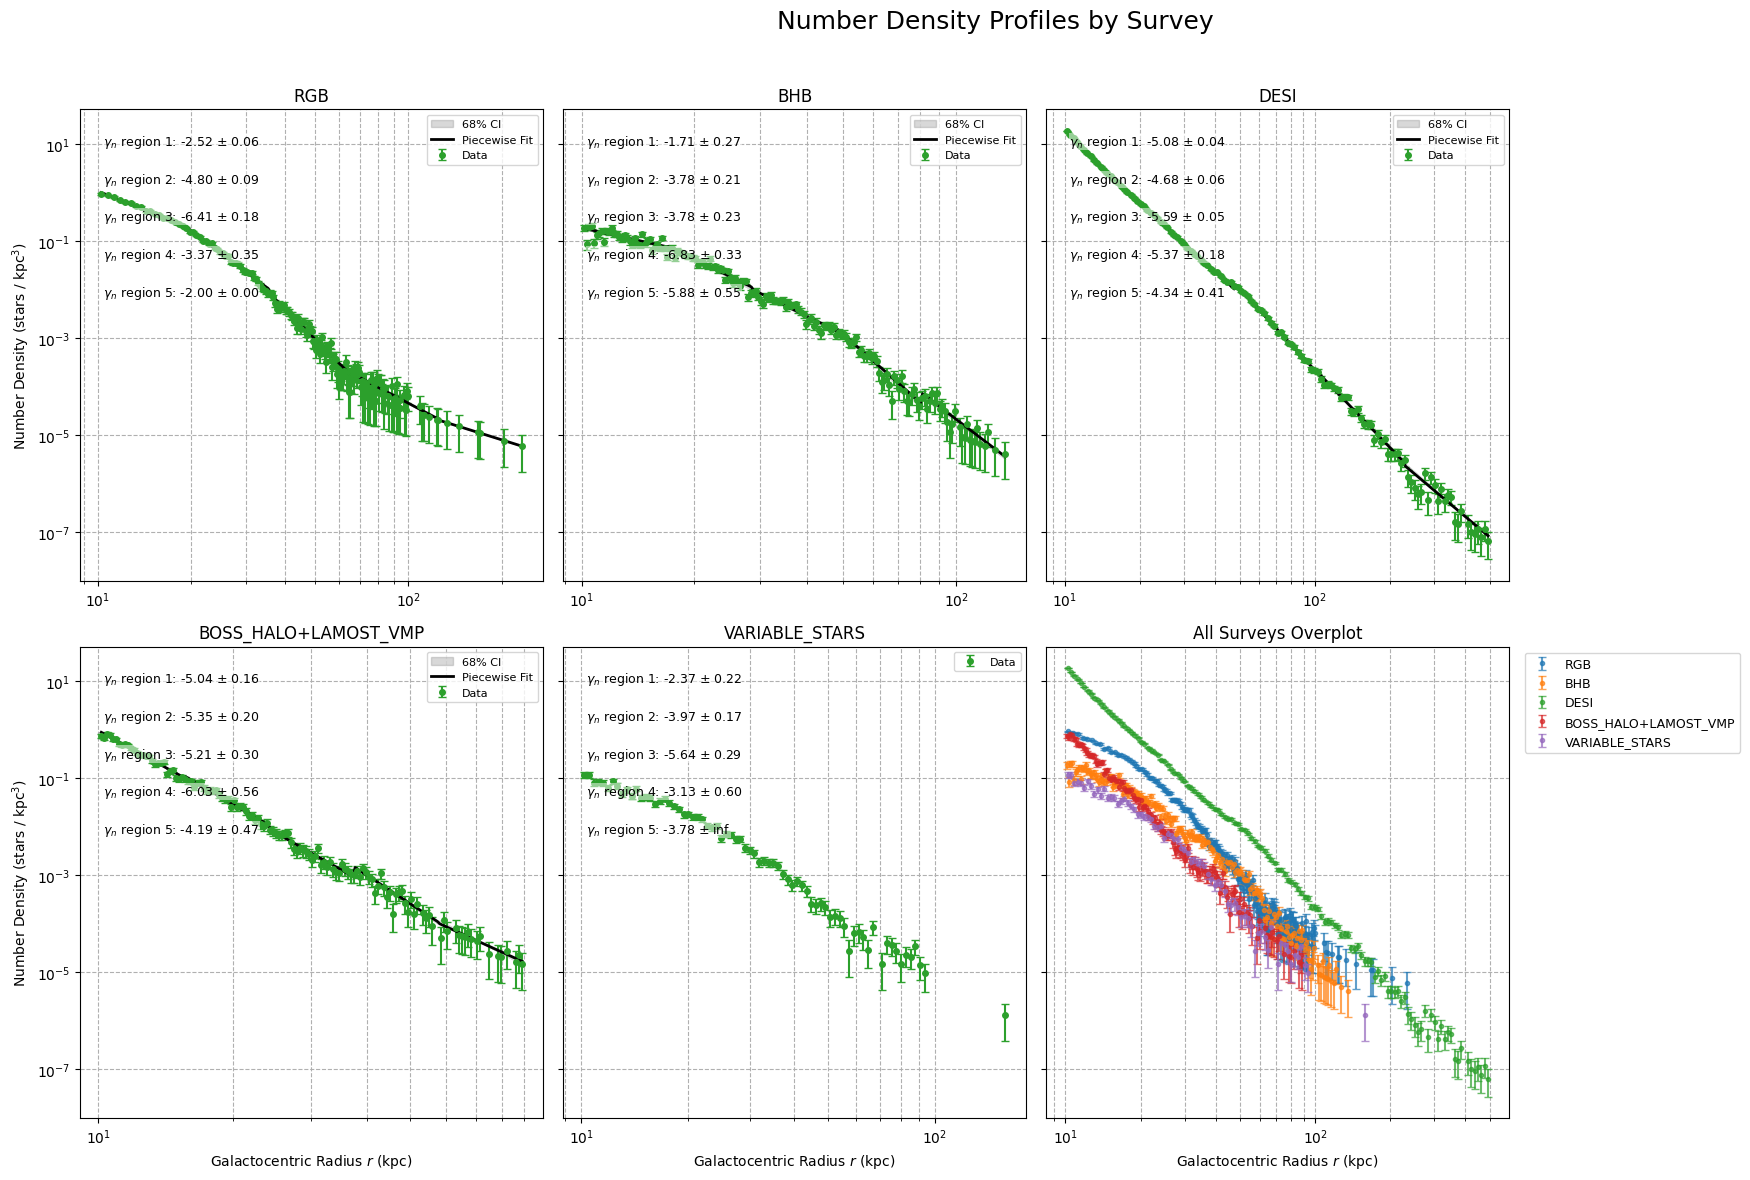


                     ANALYSIS & RESULTS SUMMARY

--- Model Configuration ---
Radial Range:                   10.0 - 500.0 kpc
Error Estimation Method:        Monte Carlo (2000 simulations)

--- Number Density Model ---
  Fit Type:                     Piecewise Power-Law (Log-Log linear fit)
  Regions:                      5

--- Velocity Dispersion Model ---
  Fit Type:                     Power-Law (Log-Log linear fit)
  DESI-specific regions:        2 (others use 1 region)

--- Fit Results (Power Law Slopes $\gamma$, where $y \propto r^\gamma$) ---

Survey: RGB
  Re-binning Config:            [(10, 30, 50), (30, 50, 10), (50, 250, 30)]
  Number Density Slopes ($\gamma_n$):
    - Region 1: -2.519 ± 0.058
    - Region 2: -4.800 ± 0.088
    - Region 3: -6.409 ± 0.178
    - Region 4: -3.372 ± 0.352
    - Region 5: -2.000 ± 0.000
  Velocity Dispersion Slopes ($\gamma_{\sigma}$):
    - Region 1: -0.244 ± 0.024

Survey: BHB
  Re-binning Config:            [(10, 50, 75), (50, 100, 15), (100

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import warnings

# --- Model definitions ---

def _power_law(x, a, b):
    """A simple power-law function: y = a * x^b"""
    return a * np.power(x, b)

def _linear_fit_model(log_x, slope, intercept):
    """A linear function for fitting in log-log space: log_y = slope * log_x + intercept"""
    return slope * log_x + intercept

class SurveyAnalyzer:
    """
    A class to analyze survey data, inspired by a professional astrophysics pipeline.
    Handles loading, dynamic re-binning, power-law fitting, and plotting.
    """

    def __init__(self, filepath):
        """Initializes the analyzer by loading and preparing the data."""
        self.df = self._load_and_prepare_data(filepath)
        self.lit_df_kg, self.lit_df_bhb, self.lit_df_hg, self.lit_df_gia, self.lit_df_kaf, self.lit_df_dea, self.lit_df_bat = self._load_literature_data()
        if self.df is not None:
            self.surveys = self.df['survey'].unique()
            print(f"Data loaded successfully. Surveys found: {self.surveys}")
            self.survey_data = {}
            self.run_params = {}

    def _load_literature_data(self):
        """Loads literature data for comparison plots (without errors)."""
        df_kg, df_bhb, df_bat, df_hg, df_dea, df_kaf, df_gia = None, None, None, None, None, None, None
        # Helper function to reduce repetition
        def load_csv(filename):
            try:
                df = pd.read_csv(filename)
                print(f"Literature data '{filename}' loaded successfully.")
                # Check for expected columns for later processing
                if 'r' not in df.columns or 'sigma_gsr' not in df.columns:
                     print(f"Warning: Literature file '{filename}' missing required 'r' or 'sigma_gsr' column.")
                return df
            except FileNotFoundError:
                print(f"Warning: Literature data file '{filename}' not found. Skipping.")
            except Exception as e:
                print(f"Error loading '{filename}': {e}. Skipping.")
                return None

        df_kg = load_csv('bhatt_sigmagsr_kg_combined.csv')
        df_bhb = load_csv('bhatt_sigmagsr_bhb_combined.csv')
        df_bat = load_csv('battaglia_et_al_combined.csv')
        df_dea = load_csv('deason_et_al_combined.csv')
        df_kaf = load_csv('kafle_et_al_bhb_combined.csv')
        df_gia = load_csv('giants_combined.csv')
        df_hg = load_csv('bhatt_sigmagsr_hg_combined.csv')

        return df_kg, df_bhb, df_hg, df_gia, df_kaf, df_dea , df_bat

    def _load_and_prepare_data(self, filepath):
        """Loads, cleans, and validates the input CSV file."""
        try:
            df = pd.read_csv(filepath, header=0, encoding='latin1')
            df.columns = df.columns.str.strip()
            rename_map = {
                'Bin_center': 'bin_centres', 'sgsr': 'sigma_gsr',
                'x_low': 'bin_edge_lower', 'x_up': 'bin_edge_upper',
                'Counts': 'counts', 'e_gsr': 'sigma_gsr_error',
                'Survey': 'survey'
            }
            df.rename(columns=rename_map, inplace=True)
            numeric_cols = [
                'bin_centres', 'sigma_gsr', 'bin_edge_lower',
                'bin_edge_upper', 'counts', 'sigma_gsr_error'
            ]
            for col in numeric_cols:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            
            # Add small value to zero errors before processing to avoid division by zero in log space or weighting
            if 'sigma_gsr_error' in df.columns:
                df['sigma_gsr_error'] = df['sigma_gsr_error'].replace(0, 1e-3)

            df.dropna(subset=numeric_cols, inplace=True)
            return df
        except FileNotFoundError:
            print(f"Error: The file '{filepath}' was not found.")
            return None
        except Exception as e:
            print(f"An error occurred during data loading: {e}")
            return None

    def _generate_bin_edges(self, rebin_config):
        """Generates a final set of bin edges from a configuration list."""
        all_edges = []
        for (start, end, num_bins) in rebin_config:
            edges = np.logspace(np.log10(start), np.log10(end), num_bins + 1)
            all_edges.append(edges)
        return np.unique(np.concatenate(all_edges))

    def _rebin_data(self, df, bin_edges):
        """Re-bins the dataframe into larger bins using a weighted average for sigma_gsr."""
        new_bins = []
        for i in range(len(bin_edges) - 1):
            low, high = bin_edges[i], bin_edges[i+1]
            sub_df = df[(df['bin_centres'] >= low) & (df['bin_centres'] < high)]

            if len(sub_df) == 0: continue

            weights = 1.0 / (sub_df['sigma_gsr_error']**2 + 1e-9)
            if np.sum(weights) <= 0: continue

            avg_sigma_gsr = np.sum(sub_df['sigma_gsr'] * weights) / np.sum(weights)
            err_sigma_gsr = 1.0 / np.sqrt(np.sum(weights))

            new_bins.append({
                'bin_centres': (low + high) / 2.0,
                'sigma_gsr': avg_sigma_gsr,
                'sigma_gsr_error': err_sigma_gsr,
            })
        return pd.DataFrame(new_bins)

    def _calculate_number_density(self, df):
        """Calculates number density and its Poissonian error."""
        volume = (4/3) * np.pi * (df['bin_edge_upper']**3 - df['bin_edge_lower']**3)
        # Avoid division by zero if bin edges are identical
        volume = volume.replace(0, np.nan)
        df['number_density'] = df['counts'] / volume
        df['number_density_error'] = np.sqrt(df['counts']) / volume
        # Propagate zero error replacement for safety
        df['number_density_error'] = df['number_density_error'].replace(0, 1e-9)
        return df

    def _fit_piecewise_power_law(self, r, values, errors, n_regions=1):
        """
        Fits power laws to different regions of the data by performing a linear fit in log-log space.
        log10(y) = slope * log10(x) + intercept.
        A single power law fit is achieved by setting n_regions=1.
        """
        # --- 1. Data preparation and transformation to log space ---
        valid_mask = (values > 0) & (errors > 0) & (r > 0) & ~np.isnan(values) & ~np.isnan(errors) & ~np.isnan(r)
        if np.sum(valid_mask) < 2:
            print("Warning: Not enough valid data points (<2) for fitting.")
            return None, None

        r_valid, v_valid, e_valid = r[valid_mask], values[valid_mask], errors[valid_mask]

        log_r_valid = np.log10(r_valid)
        log_v_valid = np.log10(v_valid)
        # Error propagation: sigma_log10(v) = sigma_v / (v * ln(10))
        e_log_valid = e_valid / (v_valid * np.log(10))

        # --- 2. Region definition and fitting loop ---
        boundaries = np.linspace(log_r_valid.min(), log_r_valid.max(), n_regions + 1)
        fit_params, fit_covs = [], []

        for i in range(n_regions):
            # Define data mask for the current region
            if i == 0:
                mask = (log_r_valid >= boundaries[i]) & (log_r_valid <= boundaries[i+1])
            else:
                # Ensure a slight overlap for continuity if desired, but here we keep them distinct.
                mask = (log_r_valid > boundaries[i]) & (log_r_valid <= boundaries[i+1])

            if np.sum(mask) >= 2:
                try:
                    popt, pcov = curve_fit(_linear_fit_model, log_r_valid[mask], log_v_valid[mask], sigma=e_log_valid[mask], maxfev=10000)
                    fit_params.append(popt)  # popt = [slope, intercept]
                    fit_covs.append(pcov)
                except RuntimeError as e:
                    print(f"RuntimeError during fit for region {i}: {e}")
                    fit_params.append([np.nan, np.nan]); fit_covs.append(np.full((2, 2), np.nan))
            else:
                fit_params.append([np.nan, np.nan]); fit_covs.append(np.full((2, 2), np.nan))

        # --- 3. Prediction function construction ---
        def piecewise_func(x):
            log_x = np.log10(x)
            result = np.full_like(x, np.nan, dtype=float) # Initialize with NaN

            for i, params in enumerate(fit_params):
                if not np.isnan(params[0]):
                    if n_regions == 1:
                        mask = np.ones_like(x, dtype=bool) # Apply to all x for single fit
                    else:
                        if i == 0:
                            mask = log_x <= boundaries[i+1]
                        elif i == n_regions - 1:
                            mask = log_x > boundaries[i]
                        else:
                            mask = (log_x > boundaries[i]) & (log_x <= boundaries[i+1])

                    log_y_fit = _linear_fit_model(log_x[mask], *params)
                    result[mask] = np.power(10, log_y_fit)
            return result

        return piecewise_func, (boundaries, fit_params, fit_covs)

    def _generate_fit_realizations(self, fit_info, n_sims=500):
        """Generates plausible fit functions based on fitting uncertainty from log-log space."""
        if fit_info is None:
            return []
        
        boundaries, fit_params, fit_covs = fit_info
        n_regions = len(fit_params)
        realizations = []

        for _ in range(n_sims):
            sim_params_list = []
            for p, c in zip(fit_params, fit_covs):
                if not np.any(np.isnan(p)) and not np.any(np.isnan(c)):
                    try:
                        # Ensure covariance matrix is positive semi-definite for simulation
                        eigvals = np.linalg.eigvalsh(c)
                        if np.any(eigvals < 0):
                            # Fix non-positive definite matrix by zeroing negative eigenvalues or using diagonal approximation
                            c_stable = np.diag(np.abs(np.diag(c))) # Simple fix: use diagonal errors if matrix is unstable
                        else:
                            c_stable = c
                        
                        sim_p = np.random.multivariate_normal(p, c_stable)
                        sim_params_list.append(sim_p)
                    except np.linalg.LinAlgError:
                        sim_params_list.append([np.nan, np.nan])
                else:
                    sim_params_list.append([np.nan, np.nan])

            def single_realization(x):
                log_x = np.log10(x)
                res = np.full_like(x, np.nan, dtype=float)
                for i, params in enumerate(sim_params_list):
                    if not np.any(np.isnan(params)):
                        if n_regions == 1:
                            mask = np.ones_like(x, dtype=bool)
                        else:
                            if i == 0:
                                mask = log_x <= boundaries[i+1]
                            elif i == n_regions - 1:
                                mask = log_x > boundaries[i]
                            else:
                                mask = (log_x > boundaries[i]) & (log_x <= boundaries[i+1])
                        
                        log_y_fit = _linear_fit_model(log_x[mask], *params)
                        res[mask] = np.power(10, log_y_fit)
                return res
            realizations.append(single_realization)
        return realizations

    def run_full_analysis(self, r_min=None, r_max=None, 
                          n_density_regions=3, 
                          n_sigma_regions_desi=3, # Specific parameter for DESI sigma fit regions
                          n_sims=500, 
                          survey_rebin_configs=None):
        """Runs the analysis pipeline with power-law fitting and survey-specific configurations."""
        if self.df is None: return
        self.run_params = locals() # Store all input parameters

        for survey in self.surveys:
            print(f"\n--- Analyzing Survey: {survey} ---")
            survey_df = self.df[self.df['survey'] == survey].copy().sort_values('bin_centres')

            initial_count = len(survey_df)
            if r_min is not None: survey_df = survey_df[survey_df['bin_centres'] >= r_min]
            if r_max is not None: survey_df = survey_df[survey_df['bin_centres'] <= r_max]

            if len(survey_df) < 2:
                print(f"Skipping survey {survey}: not enough data points ({len(survey_df)}) after radial cuts.")
                continue
            print(f"Applied radial cuts: {initial_count} -> {len(survey_df)} data points.")

            # --- SIGMA GSR ANALYSIS (Power Law Fit) ---
            sigma_df = survey_df
            if survey_rebin_configs and survey in survey_rebin_configs:
                rebin_config = survey_rebin_configs[survey]
                print(f"  - Applying custom re-binning for sigma_gsr with config: {rebin_config}")
                rebin_edges = self._generate_bin_edges(rebin_config)
                sigma_df = self._rebin_data(survey_df, rebin_edges)
            else:
                print("  - No custom re-binning config for sigma_gsr. Using original binning.")

            # Determine number of regions for sigma fit: 1 for most, specific value for DESI
            n_regions_sigma = n_sigma_regions_desi if survey == 'DESI' else 1
            print(f"  - Performing {n_regions_sigma}-region power-law fit for sigma_gsr.")
            valid_s_mask = (sigma_df['sigma_gsr'] > 0) & (sigma_df['sigma_gsr_error'] > 0)
            
            s_func, s_info = self._fit_piecewise_power_law(
                sigma_df['bin_centres'][valid_s_mask], 
                sigma_df['sigma_gsr'][valid_s_mask], 
                sigma_df['sigma_gsr_error'][valid_s_mask],
                n_regions=n_regions_sigma
            )
            s_realizations = self._generate_fit_realizations(s_info, n_sims)

            # --- NUMBER DENSITY ANALYSIS (Power Law Fit) ---
            density_df = self._calculate_number_density(survey_df.copy()) # Use copy to avoid modifying base df for sigma rebinning logic
            print(f"  - Performing {n_density_regions}-region power-law fit for number density.")
            valid_n_mask = (density_df['number_density'] > 0) & (density_df['number_density_error'] > 0) & ~density_df['number_density'].isna()

            n_func, n_info = self._fit_piecewise_power_law(
                density_df['bin_centres'][valid_n_mask], 
                density_df['number_density'][valid_n_mask], 
                density_df['number_density_error'][valid_n_mask], 
                n_regions=n_density_regions
            )
            n_realizations = self._generate_fit_realizations(n_info, n_sims)

            self.survey_data[survey] = {
                'sigma_df': sigma_df, 'density_df': density_df,
                'valid_s_mask': valid_s_mask, 'valid_n_mask': valid_n_mask,
                's_func': s_func, 's_info': s_info, 's_realizations': s_realizations,
                'n_func': n_func, 'n_info': n_info, 'n_realizations': n_realizations,
            }

        self._create_summary_figures()
        self.print_summary()

    def _plot_fit_text(self, ax, fit_info, label_prefix="$\gamma$"):
        """Helper function to draw fit parameters on a plot axis."""
        if fit_info:
            _, params_list, covs_list = fit_info
            text_y_start = 0.95 # Start near top of plot area
            for i, (params, cov_matrix) in enumerate(zip(params_list, covs_list)):
                if not np.any(np.isnan(params)) and not np.any(np.isnan(cov_matrix)):
                    slope = params[0]
                    slope_err = np.sqrt(np.diag(cov_matrix))[0] if cov_matrix[0,0] >= 0 else np.nan
                    
                    region_label = "" if len(params_list) == 1 else f" region {i+1}"
                    text_str = f"{label_prefix}{region_label}: {slope:.2f} $\pm$ {slope_err:.2f}"
                    
                    # Position text in upper left corner, moving down for multiple lines
                    ax.text(0.05, text_y_start - i * 0.08, text_str, 
                            transform=ax.transAxes, fontsize=9, ha='left', va='top', color='black',
                            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=0.1))

    def _plot_single_sigma_gsr(self, ax, survey):
        """Plots the velocity dispersion analysis for one survey on a given axis."""
        data = self.survey_data[survey]
        df, valid_s_mask = data['sigma_df'], data['valid_s_mask']
        df_valid = df[valid_s_mask]

        # Plot the survey's main data points
        ax.errorbar(df_valid['bin_centres'], df_valid['sigma_gsr'], yerr=df_valid['sigma_gsr_error'], 
                    fmt='o', capsize=3, label=f'{survey} Data', color='C0', markersize=4)

        # Plot power-law fit and confidence interval
        if data['s_func'] and data['s_realizations']:
            r_fit = np.logspace(np.log10(df_valid['bin_centres'].min()), np.log10(df_valid['bin_centres'].max()), 200)
            s_fit_evals = [f(r_fit) for f in data['s_realizations']]
            # Filter out potential NaN rows from realizations before calculating percentile
            valid_fits = [fit for fit in s_fit_evals if not np.any(np.isnan(fit))]
            if valid_fits:
                lower, upper = np.nanpercentile(valid_fits, [15.87, 84.13], axis=0) # 1-sigma interval
                ax.fill_between(r_fit, lower, upper, color='gray', alpha=0.3, label='68% CI')
                ax.plot(r_fit, data['s_func'](r_fit), 'k-', lw=2, label='Power-Law Fit')

        # Add literature data comparison
        if survey == 'RGB' and self.lit_df_kg is not None:
            ax.plot(self.lit_df_kg['r'], self.lit_df_kg['sigma_gsr'], marker='s', linestyle='none', label='Bhattacharjee+ (K giants)', color='black', alpha=0.7, zorder=1)
        if survey == 'BHB' and self.lit_df_bhb is not None:
            ax.plot(self.lit_df_bhb['r'], self.lit_df_bhb['sigma_gsr'], marker='^', linestyle='none', label='Bhattacharjee+ (BHB)', color='blue', alpha=0.7, zorder=1)

        ax.set_title(survey, fontsize=12)
        ax.legend(loc='best', fontsize=8)
        ax.set_xscale('log')
        ax.set_yscale('log') # Changed to log scale for better visualization of power law fits
        ax.set_ylim(bottom=max(1, df_valid['sigma_gsr'].min() * 0.5), top=min(200, df_valid['sigma_gsr'].max() * 2)) # Adjust y-limits dynamically
        ax.grid(True, which='both', ls='--')
        
        # Add fit text to plot
        self._plot_fit_text(ax, data['s_info'], label_prefix="$\gamma_{\sigma}$")

    def _plot_single_number_density(self, ax, survey):
        """Plots the number density analysis for one survey, including fit summary."""
        data = self.survey_data[survey]
        df, valid_n_mask = data['density_df'], data['valid_n_mask']
        df_valid = df[valid_n_mask]
        
        if df_valid.empty:
            ax.set_title(survey, fontsize=12)
            ax.text(0.5, 0.5, "No valid data", transform=ax.transAxes, ha='center', va='center')
            return

        r_fit_domain = np.logspace(np.log10(df_valid['bin_centres'].min()), np.log10(df_valid['bin_centres'].max()), 200)

        ax.errorbar(df_valid['bin_centres'], df_valid['number_density'], yerr=df_valid['number_density_error'], 
                    fmt='o', capsize=3, label='Data', color='C2', markersize=4)
        
        if data['n_func'] and data['n_realizations']:
            n_fit_evals = [f(r_fit_domain) for f in data['n_realizations']]
            valid_fits = [fit for fit in n_fit_evals if not np.any(np.isnan(fit))]
            if valid_fits:
                lower, upper = np.nanpercentile(valid_fits, [15.87, 84.13], axis=0) # 1-sigma interval
                ax.fill_between(r_fit_domain, lower, upper, color='gray', alpha=0.3, label='68% CI')
                ax.plot(r_fit_domain, data['n_func'](r_fit_domain), 'k-', lw=2, label='Piecewise Fit')

        ax.set_title(survey, fontsize=12)
        ax.legend(loc='best', fontsize=8)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.grid(True, which='both', ls='--')

        # Add fit text to plot
        self._plot_fit_text(ax, data['n_info'], label_prefix="$\gamma_{n}$")

    def _create_summary_figures(self):
        """Creates two 2x3 summary figures for all surveys and analyses."""
        if not self.survey_data:
            return

        surveys_to_plot = list(self.survey_data.keys())

        # --- Figure 1: Velocity Dispersion Profiles ---
        fig1, axes1 = plt.subplots(2, 3, figsize=(20, 12), sharey=False) # allow different y-scales with sharey=False
        fig1.suptitle('Velocity Dispersion Profiles ($\sigma_{gsr}$) by Survey', fontsize=18)
        axes_flat1 = axes1.flatten()

        for i, survey in enumerate(surveys_to_plot):
            if i < 5:
                self._plot_single_sigma_gsr(axes_flat1[i], survey)
            else:
                # Hide unused axes if fewer than 6 surveys
                axes_flat1[i].axis('off')

        # --- Combined Literature and Survey Overplot (Panel 6) ---
        ax_over1 = axes_flat1[5]
        ax_over1.set_title("All Surveys & Literature Overplot", fontsize=12)
        
        # Plot literature data first (background)
        literature_datasets = {
            'kg': (self.lit_df_kg, 'Bhatt+ (K giants)', 'black', 'o'),
            'bhb': (self.lit_df_bhb, 'Bhatt+ (BHB)', 'blue', '^'),
            'hg': (self.lit_df_hg, 'Bhatt+ (HG)', 'orange', 'D'),
            'gia': (self.lit_df_gia, 'Giants', 'magenta', 's'),
            'kaf': (self.lit_df_kaf, 'Kafle et al.', 'purple', 'P'),
            'dea': (self.lit_df_dea, 'Deason et al.', 'brown', 'X'),
            'bat': (self.lit_df_bat, 'Battaglia et al.', 'green', '*'),
        }
        for key, (data, label, color, marker) in literature_datasets.items():
            if data is not None and 'r' in data.columns and 'sigma_gsr' in data.columns:
                try:
                    # Check for asymmetric error columns typical in literature data
                    if all(col in data.columns for col in ['sigma_gsr_lower_bound', 'sigma_gsr_upper_bound']):
                        y_error = [data['sigma_gsr'] - data['sigma_gsr_lower_bound'], data['sigma_gsr_upper_bound'] - data['sigma_gsr']]
                        ax_over1.errorbar(data['r'], data['sigma_gsr'], yerr=y_error, fmt=marker, markersize=5,
                                          capsize=3, label=label, color=color, alpha=0.6, zorder=5, linestyle='none')
                    else:
                        ax_over1.plot(data['r'], data['sigma_gsr'], marker=marker, markersize=5,
                                      linestyle='none', label=label, color=color, alpha=0.6, zorder=5)
                except Exception as e:
                    print(f"Warning: Could not plot literature data '{label}'. Reason: {e}")

        # Overplot all survey data points
        for i, survey in enumerate(surveys_to_plot):
            df = self.survey_data[survey]['sigma_df']
            ax_over1.errorbar(df['bin_centres'], df['sigma_gsr'], yerr=df['sigma_gsr_error'],
                              fmt='o', capsize=3, label=f"{survey} (This work)", color=f'C{i}', alpha=0.9, markersize=3, zorder=10)

        ax_over1.set_xscale('log')
        ax_over1.set_yscale('log')
        ax_over1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
        ax_over1.grid(True, which='both', ls='--')
        ax_over1.set_ylim(10, 200) # Set reasonable fixed limits for comparison

        for ax in axes1[:, 0]: ax.set_ylabel(r'$\sigma_{gsr}$ (km/s)')
        for ax in axes1[1, :]: ax.set_xlabel('Galactocentric Radius $r$ (kpc)')
        plt.tight_layout(rect=[0, 0, 0.88, 0.96]) # Adjust rect for outside legend
        plt.savefig("sigma_gsr_summary_plot.png", dpi=300)
        plt.show()

        # --- Figure 2: Number Density Profiles ---
        fig2, axes2 = plt.subplots(2, 3, figsize=(20, 12), sharey=True)
        fig2.suptitle('Number Density Profiles by Survey', fontsize=18)
        axes_flat2 = axes2.flatten()
        for i, survey in enumerate(surveys_to_plot):
            if i < 5:
                self._plot_single_number_density(axes_flat2[i], survey)
            else:
                axes_flat2[i].axis('off')

        ax_over2 = axes_flat2[5]
        ax_over2.set_title("All Surveys Overplot", fontsize=12)
        for i, survey in enumerate(surveys_to_plot):
            data = self.survey_data[survey]
            df, valid_n_mask = data['density_df'], data['valid_n_mask']
            df_valid = df[valid_n_mask]
            if not df_valid.empty:
                ax_over2.errorbar(df_valid['bin_centres'], df_valid['number_density'], yerr=df_valid['number_density_error'],
                                  fmt='o', capsize=3, label=survey, color=f'C{i}', alpha=0.7, markersize=3)

        ax_over2.set_xscale('log'); ax_over2.set_yscale('log')
        ax_over2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
        ax_over2.grid(True, which='both', ls='--')
        for ax in axes2[:, 0]: ax.set_ylabel(r'Number Density (stars / kpc$^3$)')
        for ax in axes2[1, :]: ax.set_xlabel('Galactocentric Radius $r$ (kpc)')
        plt.tight_layout(rect=[0, 0, 0.88, 0.96])
        plt.savefig("number_density_summary_plot.png", dpi=300)
        plt.show()

    def print_summary(self):
        """Prints a comprehensive text summary of the analysis run."""
        p = self.run_params
        print("\n" + "="*70)
        print(" " * 21 + "ANALYSIS & RESULTS SUMMARY")
        print("="*70)
        print("\n--- Model Configuration ---")
        print(f"Radial Range:                   {p.get('r_min', 'N/A')} - {p.get('r_max', 'N/A')} kpc")
        print(f"Error Estimation Method:        Monte Carlo ({p.get('n_sims', 'N/A')} simulations)")
        print("\n--- Number Density Model ---")
        print(f"  Fit Type:                     Piecewise Power-Law (Log-Log linear fit)")
        print(f"  Regions:                      {p.get('n_density_regions', 'N/A')}")
        print("\n--- Velocity Dispersion Model ---")
        print(f"  Fit Type:                     Power-Law (Log-Log linear fit)")
        print(f"  DESI-specific regions:        {p.get('n_sigma_regions_desi', 'N/A')} (others use 1 region)")

        print("\n--- Fit Results (Power Law Slopes $\gamma$, where $y \propto r^\gamma$) ---")
        for survey, data in self.survey_data.items():
            print(f"\nSurvey: {survey}")
            # Re-binning info
            rebin_configs = p.get('survey_rebin_configs')
            if rebin_configs and survey in rebin_configs:
                print(f"  Re-binning Config:            {rebin_configs[survey]}")
            else:
                print("  Re-binning Config:            None (used original bins)")

            # Number Density Slopes ($\gamma_n$)
            print("  Number Density Slopes ($\gamma_n$):")
            if data.get('n_info'):
                _, params_list, covs_list = data['n_info']
                for i, (param_vals, cov_matrix) in enumerate(zip(params_list, covs_list)):
                    if not np.any(np.isnan(param_vals)) and not np.any(np.isnan(cov_matrix)) and cov_matrix[0,0] >= 0:
                        slope, err = param_vals[0], np.sqrt(np.diag(cov_matrix))[0]
                        print(f"    - Region {i+1}: {slope:6.3f} ± {err:.3f}")
                    else:
                        print(f"    - Region {i+1}: Fit failed or high uncertainty")
            else:
                print("    - No valid fit results.")

            # Velocity Dispersion Slopes ($\gamma_{\sigma}$)
            print("  Velocity Dispersion Slopes ($\gamma_{\sigma}$):")
            if data.get('s_info'):
                _, params_list, covs_list = data['s_info']
                for i, (param_vals, cov_matrix) in enumerate(zip(params_list, covs_list)):
                    if not np.any(np.isnan(param_vals)) and not np.any(np.isnan(cov_matrix)) and cov_matrix[0,0] >= 0:
                        slope, err = param_vals[0], np.sqrt(np.diag(cov_matrix))[0]
                        print(f"    - Region {i+1}: {slope:6.3f} ± {err:.3f}")
                    else:
                        print(f"    - Region {i+1}: Fit failed or high uncertainty")
            else:
                print("    - No valid fit results.")
        print("="*70)

if __name__ == '__main__':
    FILEPATH = 'seperated_datasets.csv'
    analyzer = SurveyAnalyzer(FILEPATH)
    
    # --- DEFINE SURVEY-SPECIFIC RE-BINNING CONFIGURATIONS ---
    # Format: { 'SurveyName': [(start_kpc, end_kpc, num_bins), ...], ... }
    # Surveys not listed here will use their original binning.
    survey_specific_rebin_configs = {
        'RGB': [
            (10, 30, 50),   
            (30, 50, 10),  
            (50, 250, 30),  
        ],
        'BHB': [
            (10, 50, 75),   
            (50, 100, 15),
            (100, 250, 3)  
        ],
        'VARIABLE_STARS': [
            (10, 30, 30),
            (30, 250, 10)   
        ],
        'DESI': [
            (10, 80, 90),
            (80, 100, 10),
            (100, 250, 10)
        ],
        'BOSS_HALO+LAMOST_VMP': [
            (10, 30, 30),
            (30, 250, 10)
        ]
    }
    
    if analyzer.df is not None:
        analyzer.run_full_analysis(
            r_min=10.0,
            r_max=500.0,
            n_density_regions=5,      
            n_sigma_regions_desi=1, 
            n_sims=2000,                # Lower sims for faster execution example
            survey_rebin_configs=survey_specific_rebin_configs
        )



## Restricting the data for DESI to 100 kpc for single powerlaw modelling

Literature data 'bhatt_sigmagsr_kg_combined.csv' loaded successfully.
Literature data 'bhatt_sigmagsr_bhb_combined.csv' loaded successfully.
Literature data 'battaglia_et_al_combined.csv' loaded successfully.
Literature data 'deason_et_al_combined.csv' loaded successfully.
Literature data 'kafle_et_al_bhb_combined.csv' loaded successfully.
Literature data 'giants_combined.csv' loaded successfully.
Literature data 'bhatt_sigmagsr_hg_combined.csv' loaded successfully.
Data loaded successfully. Surveys found: ['RGB' 'BHB' 'DESI' 'BOSS_HALO+LAMOST_VMP' 'VARIABLE_STARS']

--- Analyzing Survey: RGB ---
Applied radial cuts: 194 -> 174 data points remaining.
 	- Applying custom re-binning for sigma_gsr with config: [(10, 30, 50), (30, 50, 10), (50, 250, 30)]
 	- Performing 1-region power-law fit for sigma_gsr.
 	- Performing 5-region power-law fit for number density.

--- Analyzing Survey: BHB ---
Applied radial cuts: 255 -> 161 data points remaining.
 	- Applying custom re-binning for sigma_g

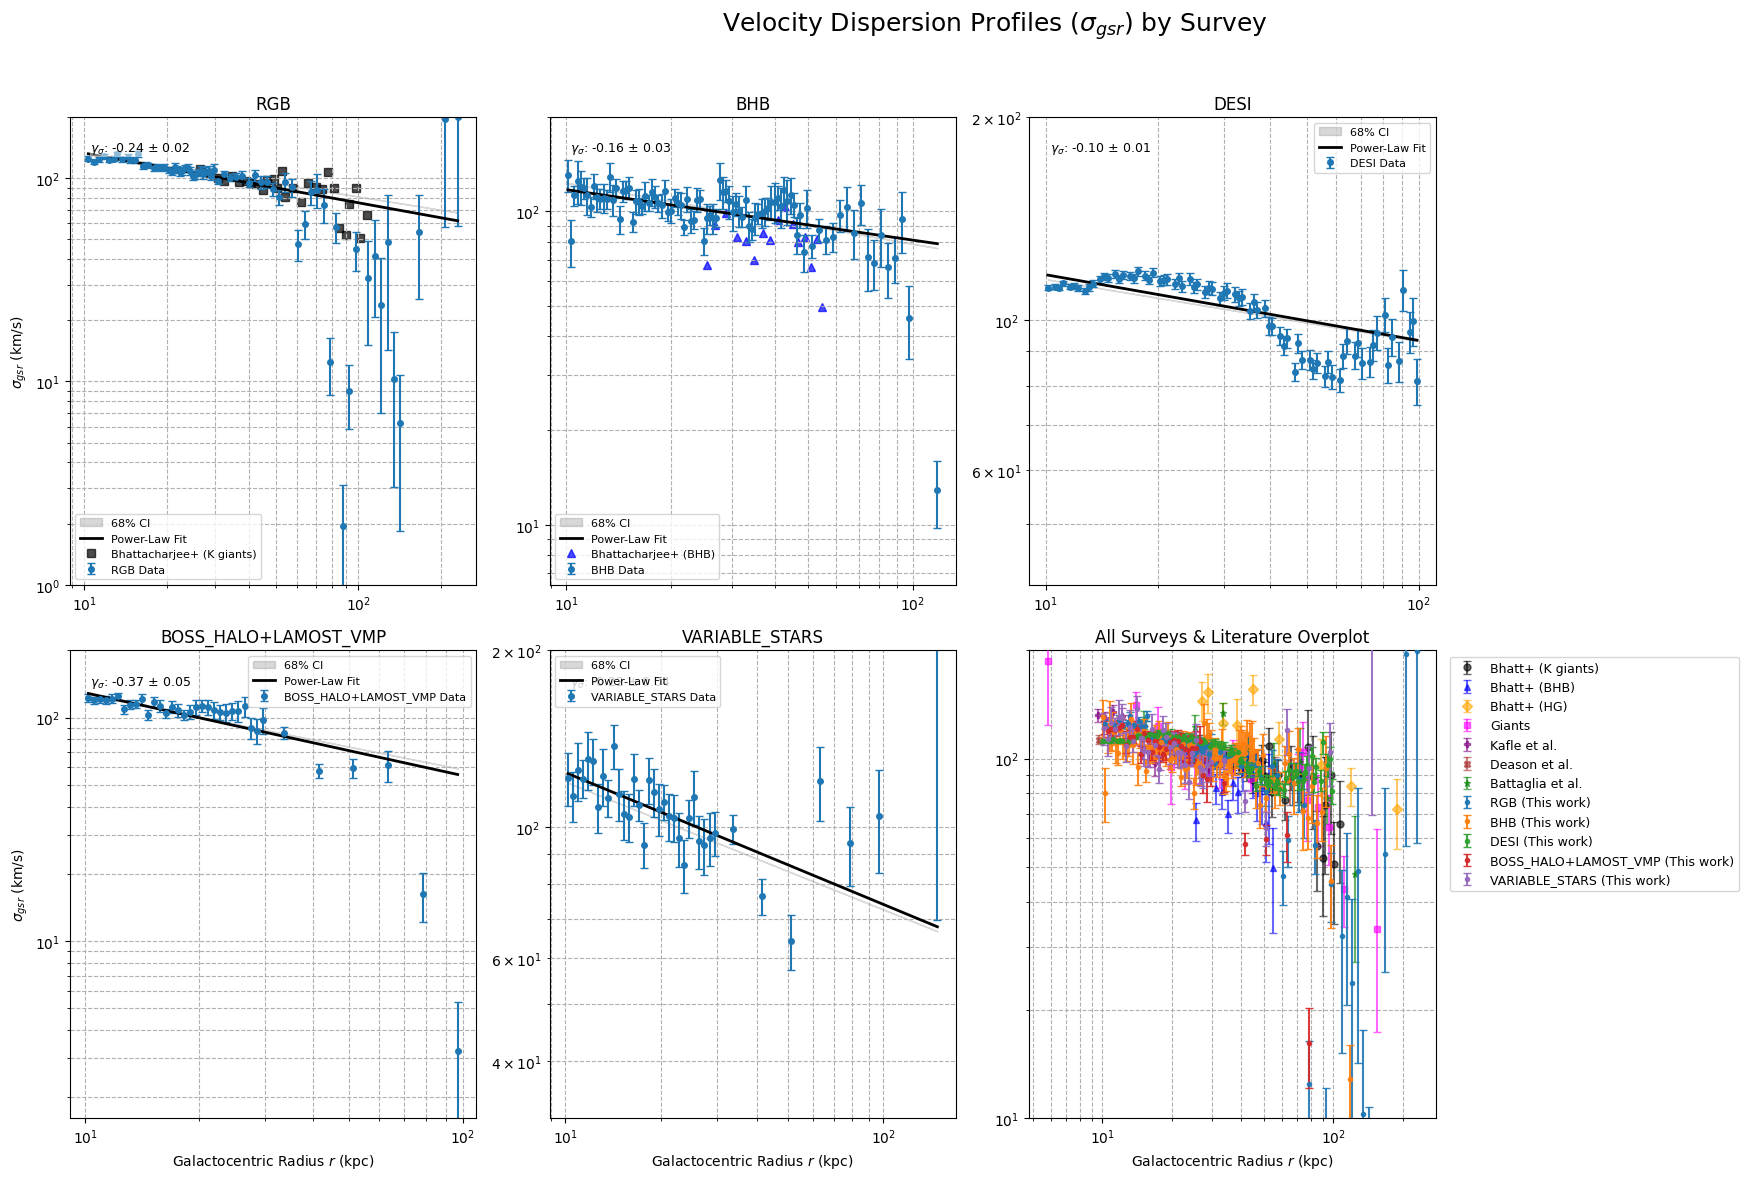

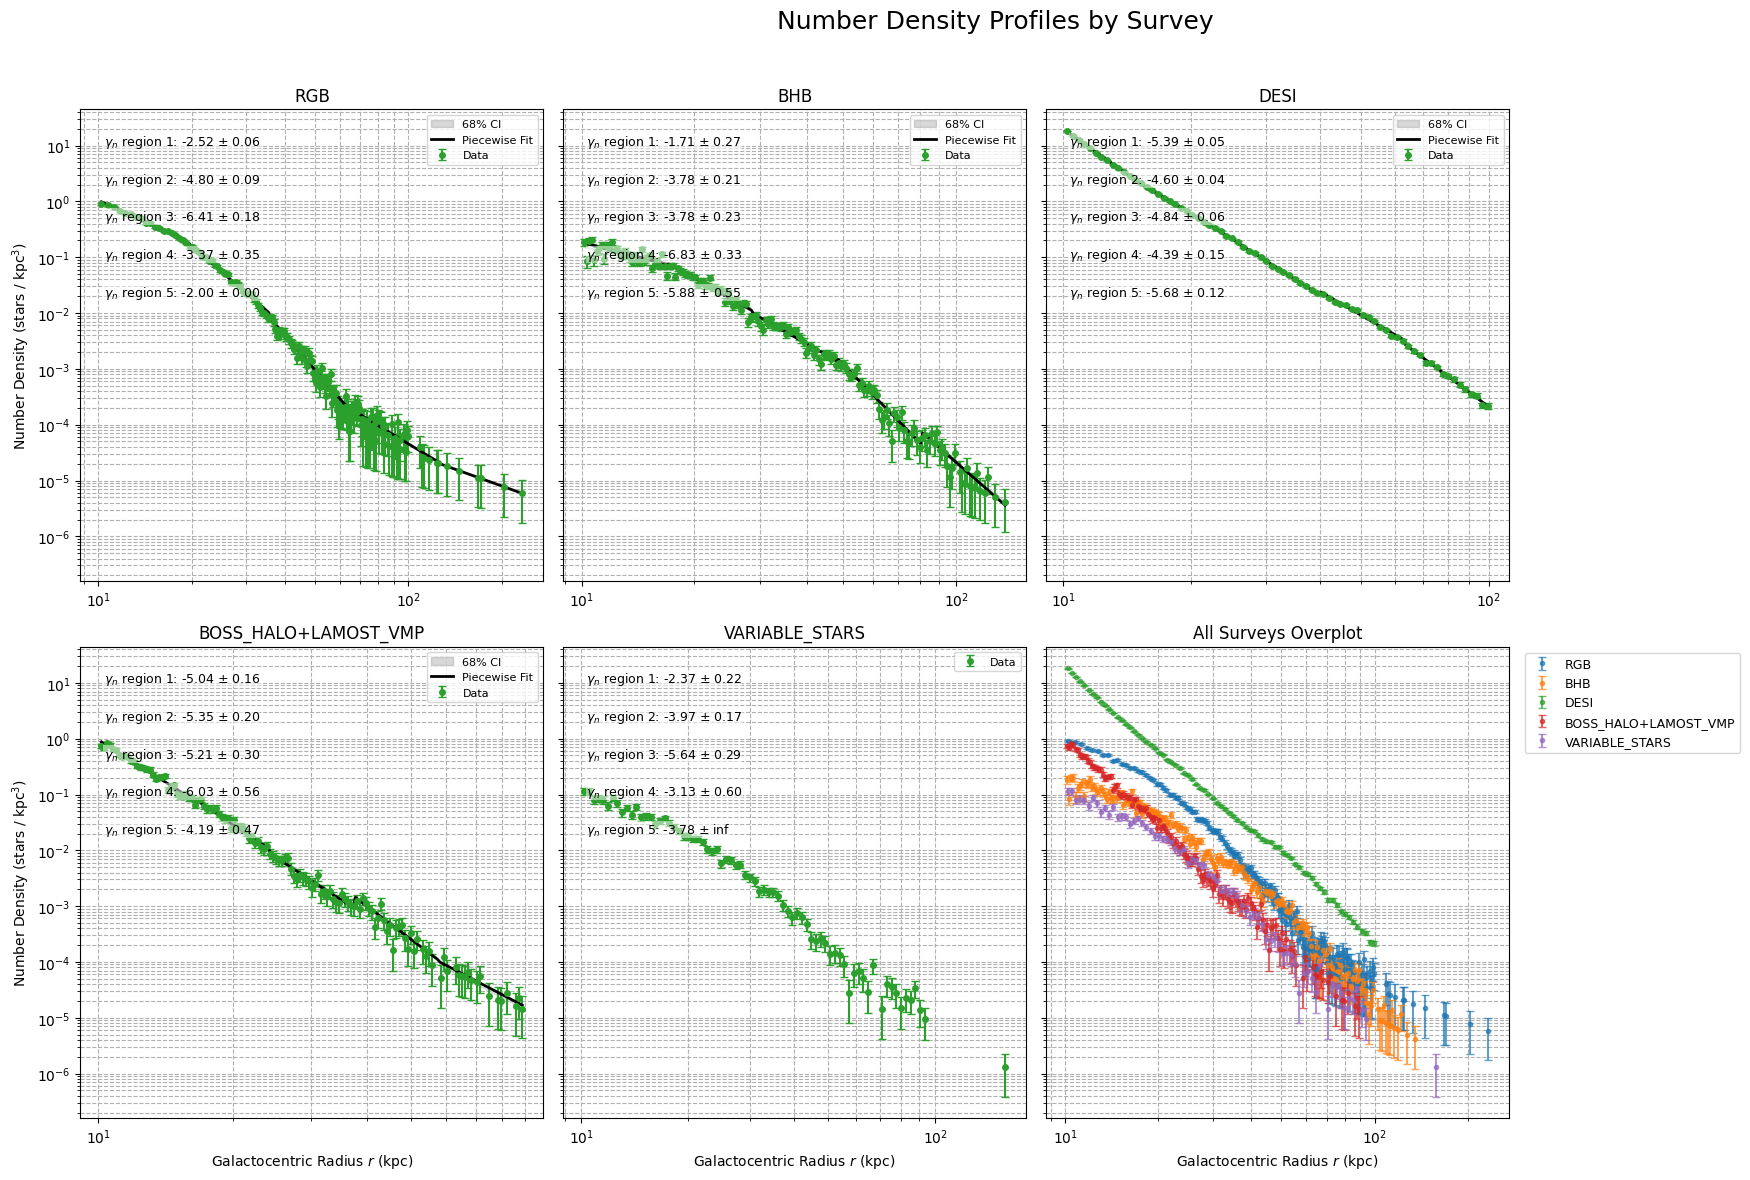


                     ANALYSIS & RESULTS SUMMARY

--- Model Configuration ---
Global Radial Range:          10.0 - 500.0 kpc
DESI Radial Cut Override:     r <= 100.0 kpc
Error Estimation Method:        Monte Carlo (2000 simulations)

--- Number Density Model ---
 	Fit Type:                 	 Piecewise Power-Law (Log-Log linear fit)
 	Regions:                 	  5

--- Velocity Dispersion Model ---
 	Fit Type:                 	 Power-Law (Log-Log linear fit)
 	DESI-specific regions:      1 (others use 1 region)

--- Fit Results (Power Law Slopes $\gamma$, where $y \propto r^\gamma$) ---

Survey: RGB
 	Re-binning Config:         	[(10, 30, 50), (30, 50, 10), (50, 250, 30)]
 	Number Density Slopes ($\gamma_n$):
 	 	- Region 1: -2.519 ± 0.058
 	 	- Region 2: -4.800 ± 0.088
 	 	- Region 3: -6.409 ± 0.178
 	 	- Region 4: -3.372 ± 0.352
 	 	- Region 5: -2.000 ± 0.000
 	Velocity Dispersion Slopes ($\gamma_{\sigma}$):
 	 	- Region 1: -0.244 ± 0.024

Survey: BHB
 	Re-binning Config:         	[(1

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import warnings

# --- Model definitions ---

def _power_law(x, a, b):
    """A simple power-law function: y = a * x^b"""
    return a * np.power(x, b)

def _linear_fit_model(log_x, slope, intercept):
    """A linear function for fitting in log-log space: log_y = slope * log_x + intercept"""
    return slope * log_x + intercept

class SurveyAnalyzer:
    """
    A class to analyze survey data, inspired by a professional astrophysics pipeline.
    Handles loading, dynamic re-binning, power-law fitting, and plotting.
    """

    def __init__(self, filepath):
        """Initializes the analyzer by loading and preparing the data."""
        self.df = self._load_and_prepare_data(filepath)
        self.lit_df_kg, self.lit_df_bhb, self.lit_df_hg, self.lit_df_gia, self.lit_df_kaf, self.lit_df_dea, self.lit_df_bat = self._load_literature_data()
        if self.df is not None:
            self.surveys = self.df['survey'].unique()
            print(f"Data loaded successfully. Surveys found: {self.surveys}")
            self.survey_data = {}
            self.run_params = {}

    def _load_literature_data(self):
        """Loads literature data for comparison plots (without errors)."""
        df_kg, df_bhb, df_bat, df_hg, df_dea, df_kaf, df_gia = None, None, None, None, None, None, None
        # Helper function to reduce repetition
        def load_csv(filename):
            try:
                df = pd.read_csv(filename)
                print(f"Literature data '{filename}' loaded successfully.")
                # Check for expected columns for later processing
                if 'r' not in df.columns or 'sigma_gsr' not in df.columns:
                        print(f"Warning: Literature file '{filename}' missing required 'r' or 'sigma_gsr' column.")
                return df
            except FileNotFoundError:
                print(f"Warning: Literature data file '{filename}' not found. Skipping.")
                return None
            except Exception as e:
                print(f"Error loading '{filename}': {e}. Skipping.")
                return None

        df_kg = load_csv('bhatt_sigmagsr_kg_combined.csv')
        df_bhb = load_csv('bhatt_sigmagsr_bhb_combined.csv')
        df_bat = load_csv('battaglia_et_al_combined.csv')
        df_dea = load_csv('deason_et_al_combined.csv')
        df_kaf = load_csv('kafle_et_al_bhb_combined.csv')
        df_gia = load_csv('giants_combined.csv')
        df_hg = load_csv('bhatt_sigmagsr_hg_combined.csv')

        return df_kg, df_bhb, df_hg, df_gia, df_kaf, df_dea , df_bat

    def _load_and_prepare_data(self, filepath):
        """Loads, cleans, and validates the input CSV file."""
        try:
            df = pd.read_csv(filepath, header=0, encoding='latin1')
            df.columns = df.columns.str.strip()
            rename_map = {
                'Bin_center': 'bin_centres', 'sgsr': 'sigma_gsr',
                'x_low': 'bin_edge_lower', 'x_up': 'bin_edge_upper',
                'Counts': 'counts', 'e_gsr': 'sigma_gsr_error',
                'Survey': 'survey'
            }
            df.rename(columns=rename_map, inplace=True)
            numeric_cols = [
                'bin_centres', 'sigma_gsr', 'bin_edge_lower',
                'bin_edge_upper', 'counts', 'sigma_gsr_error'
            ]
            for col in numeric_cols:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            
            # Add small value to zero errors before processing to avoid division by zero in log space or weighting
            if 'sigma_gsr_error' in df.columns:
                df['sigma_gsr_error'] = df['sigma_gsr_error'].replace(0, 1e-3)

            df.dropna(subset=numeric_cols, inplace=True)
            return df
        except FileNotFoundError:
            print(f"Error: The file '{filepath}' was not found.")
            return None
        except Exception as e:
            print(f"An error occurred during data loading: {e}")
            return None

    def _generate_bin_edges(self, rebin_config):
        """Generates a final set of bin edges from a configuration list."""
        all_edges = []
        for (start, end, num_bins) in rebin_config:
            edges = np.logspace(np.log10(start), np.log10(end), num_bins + 1)
            all_edges.append(edges)
        return np.unique(np.concatenate(all_edges))

    def _rebin_data(self, df, bin_edges):
        """Re-bins the dataframe into larger bins using a weighted average for sigma_gsr."""
        new_bins = []
        for i in range(len(bin_edges) - 1):
            low, high = bin_edges[i], bin_edges[i+1]
            sub_df = df[(df['bin_centres'] >= low) & (df['bin_centres'] < high)]

            if len(sub_df) == 0: continue

            weights = 1.0 / (sub_df['sigma_gsr_error']**2 + 1e-9)
            if np.sum(weights) <= 0: continue

            avg_sigma_gsr = np.sum(sub_df['sigma_gsr'] * weights) / np.sum(weights)
            err_sigma_gsr = 1.0 / np.sqrt(np.sum(weights))

            new_bins.append({
                'bin_centres': (low + high) / 2.0,
                'sigma_gsr': avg_sigma_gsr,
                'sigma_gsr_error': err_sigma_gsr,
            })
        return pd.DataFrame(new_bins)

    def _calculate_number_density(self, df):
        """Calculates number density and its Poissonian error."""
        volume = (4/3) * np.pi * (df['bin_edge_upper']**3 - df['bin_edge_lower']**3)
        # Avoid division by zero if bin edges are identical
        volume = volume.replace(0, np.nan)
        df['number_density'] = df['counts'] / volume
        df['number_density_error'] = np.sqrt(df['counts']) / volume
        # Propagate zero error replacement for safety
        df['number_density_error'] = df['number_density_error'].replace(0, 1e-9)
        return df

    def _fit_piecewise_power_law(self, r, values, errors, n_regions=1):
        """
        Fits power laws to different regions of the data by performing a linear fit in log-log space.
        log10(y) = slope * log10(x) + intercept.
        A single power law fit is achieved by setting n_regions=1.
        """
        # --- 1. Data preparation and transformation to log space ---
        valid_mask = (values > 0) & (errors > 0) & (r > 0) & ~np.isnan(values) & ~np.isnan(errors) & ~np.isnan(r)
        if np.sum(valid_mask) < 2:
            print("Warning: Not enough valid data points (<2) for fitting.")
            return None, None

        r_valid, v_valid, e_valid = r[valid_mask], values[valid_mask], errors[valid_mask]

        log_r_valid = np.log10(r_valid)
        log_v_valid = np.log10(v_valid)
        # Error propagation: sigma_log10(v) = sigma_v / (v * ln(10))
        e_log_valid = e_valid / (v_valid * np.log(10))

        # --- 2. Region definition and fitting loop ---
        boundaries = np.linspace(log_r_valid.min(), log_r_valid.max(), n_regions + 1)
        fit_params, fit_covs = [], []

        for i in range(n_regions):
            # Define data mask for the current region
            if i == 0:
                mask = (log_r_valid >= boundaries[i]) & (log_r_valid <= boundaries[i+1])
            else:
                # Ensure a slight overlap for continuity if desired, but here we keep them distinct.
                mask = (log_r_valid > boundaries[i]) & (log_r_valid <= boundaries[i+1])

            if np.sum(mask) >= 2:
                try:
                    popt, pcov = curve_fit(_linear_fit_model, log_r_valid[mask], log_v_valid[mask], sigma=e_log_valid[mask], maxfev=10000)
                    fit_params.append(popt)  # popt = [slope, intercept]
                    fit_covs.append(pcov)
                except RuntimeError as e:
                    print(f"RuntimeError during fit for region {i}: {e}")
                    fit_params.append([np.nan, np.nan]); fit_covs.append(np.full((2, 2), np.nan))
            else:
                fit_params.append([np.nan, np.nan]); fit_covs.append(np.full((2, 2), np.nan))

        # --- 3. Prediction function construction ---
        def piecewise_func(x):
            log_x = np.log10(x)
            result = np.full_like(x, np.nan, dtype=float) # Initialize with NaN

            for i, params in enumerate(fit_params):
                if not np.isnan(params[0]):
                    if n_regions == 1:
                        mask = np.ones_like(x, dtype=bool) # Apply to all x for single fit
                    else:
                        if i == 0:
                            mask = log_x <= boundaries[i+1]
                        elif i == n_regions - 1:
                            mask = log_x > boundaries[i]
                        else:
                            mask = (log_x > boundaries[i]) & (log_x <= boundaries[i+1])

                    log_y_fit = _linear_fit_model(log_x[mask], *params)
                    result[mask] = np.power(10, log_y_fit)
            return result

        return piecewise_func, (boundaries, fit_params, fit_covs)

    def _generate_fit_realizations(self, fit_info, n_sims=500):
        """Generates plausible fit functions based on fitting uncertainty from log-log space."""
        if fit_info is None:
            return []
        
        boundaries, fit_params, fit_covs = fit_info
        n_regions = len(fit_params)
        realizations = []

        for _ in range(n_sims):
            sim_params_list = []
            for p, c in zip(fit_params, fit_covs):
                if not np.any(np.isnan(p)) and not np.any(np.isnan(c)):
                    try:
                        # Ensure covariance matrix is positive semi-definite for simulation
                        eigvals = np.linalg.eigvalsh(c)
                        if np.any(eigvals < 0):
                            # Fix non-positive definite matrix by zeroing negative eigenvalues or using diagonal approximation
                            c_stable = np.diag(np.abs(np.diag(c))) # Simple fix: use diagonal errors if matrix is unstable
                        else:
                            c_stable = c
                        
                        sim_p = np.random.multivariate_normal(p, c_stable)
                        sim_params_list.append(sim_p)
                    except np.linalg.LinAlgError:
                        sim_params_list.append([np.nan, np.nan])
                else:
                    sim_params_list.append([np.nan, np.nan])

            def single_realization(x):
                log_x = np.log10(x)
                res = np.full_like(x, np.nan, dtype=float)
                for i, params in enumerate(sim_params_list):
                    if not np.any(np.isnan(params)):
                        if n_regions == 1:
                            mask = np.ones_like(x, dtype=bool)
                        else:
                            if i == 0:
                                mask = log_x <= boundaries[i+1]
                            elif i == n_regions - 1:
                                mask = log_x > boundaries[i]
                            else:
                                mask = (log_x > boundaries[i]) & (log_x <= boundaries[i+1])
                        
                        log_y_fit = _linear_fit_model(log_x[mask], *params)
                        res[mask] = np.power(10, log_y_fit)
                return res
            realizations.append(single_realization)
        return realizations

    def run_full_analysis(self, r_min=None, r_max=None, 
                          desi_r_max_override=None, # MODIFICATION: Added parameter for DESI r_max override
                          n_density_regions=3, 
                          n_sigma_regions_desi=3, # Specific parameter for DESI sigma fit regions
                          n_sims=500, 
                          survey_rebin_configs=None):
        """Runs the analysis pipeline with power-law fitting and survey-specific configurations."""
        if self.df is None: return
        # Store all input parameters, adding the new override parameter to locals() first
        run_params_dict = locals().copy()
        self.run_params = run_params_dict

        for survey in self.surveys:
            print(f"\n--- Analyzing Survey: {survey} ---")
            survey_df = self.df[self.df['survey'] == survey].copy().sort_values('bin_centres')

            initial_count = len(survey_df)
            
            # --- MODIFICATION: Apply radial cuts with survey-specific logic ---
            # 1. Apply minimum radius cut globally
            if r_min is not None: 
                survey_df = survey_df[survey_df['bin_centres'] >= r_min]

            # 2. Determine and apply maximum radius cut (with specific override for DESI)
            effective_r_max = r_max # Start with global default from parameters
            if survey == 'DESI' and desi_r_max_override is not None:
                effective_r_max = desi_r_max_override # Override global value for DESI
                print(f"   -> Applying DESI specific r_max override: {effective_r_max} kpc")

            if effective_r_max is not None: 
                survey_df = survey_df[survey_df['bin_centres'] <= effective_r_max]
            # --- End of modification ---

            if len(survey_df) < 2:
                print(f"Skipping survey {survey}: not enough data points ({len(survey_df)}) after radial cuts.")
                continue
            print(f"Applied radial cuts: {initial_count} -> {len(survey_df)} data points remaining.")

            # --- SIGMA GSR ANALYSIS (Power Law Fit) ---
            sigma_df = survey_df
            if survey_rebin_configs and survey in survey_rebin_configs:
                rebin_config = survey_rebin_configs[survey]
                print(f" 	- Applying custom re-binning for sigma_gsr with config: {rebin_config}")
                rebin_edges = self._generate_bin_edges(rebin_config)
                sigma_df = self._rebin_data(survey_df, rebin_edges)
            else:
                print(" 	- No custom re-binning config for sigma_gsr. Using original binning.")

            # Determine number of regions for sigma fit: 1 for most, specific value for DESI
            n_regions_sigma = n_sigma_regions_desi if survey == 'DESI' else 1
            print(f" 	- Performing {n_regions_sigma}-region power-law fit for sigma_gsr.")
            valid_s_mask = (sigma_df['sigma_gsr'] > 0) & (sigma_df['sigma_gsr_error'] > 0)
            
            s_func, s_info = self._fit_piecewise_power_law(
                sigma_df['bin_centres'][valid_s_mask], 
                sigma_df['sigma_gsr'][valid_s_mask], 
                sigma_df['sigma_gsr_error'][valid_s_mask],
                n_regions=n_regions_sigma
            )
            s_realizations = self._generate_fit_realizations(s_info, n_sims)

            # --- NUMBER DENSITY ANALYSIS (Power Law Fit) ---
            density_df = self._calculate_number_density(survey_df.copy()) # Use copy to avoid modifying base df for sigma rebinning logic
            print(f" 	- Performing {n_density_regions}-region power-law fit for number density.")
            valid_n_mask = (density_df['number_density'] > 0) & (density_df['number_density_error'] > 0) & ~density_df['number_density'].isna()

            n_func, n_info = self._fit_piecewise_power_law(
                density_df['bin_centres'][valid_n_mask], 
                density_df['number_density'][valid_n_mask], 
                density_df['number_density_error'][valid_n_mask], 
                n_regions=n_density_regions
            )
            n_realizations = self._generate_fit_realizations(n_info, n_sims)

            self.survey_data[survey] = {
                'sigma_df': sigma_df, 'density_df': density_df,
                'valid_s_mask': valid_s_mask, 'valid_n_mask': valid_n_mask,
                's_func': s_func, 's_info': s_info, 's_realizations': s_realizations,
                'n_func': n_func, 'n_info': n_info, 'n_realizations': n_realizations,
            }

        self._create_summary_figures()
        self.print_summary()

    def _plot_fit_text(self, ax, fit_info, label_prefix="$\gamma$"):
        """Helper function to draw fit parameters on a plot axis."""
        if fit_info:
            _, params_list, covs_list = fit_info
            text_y_start = 0.95 # Start near top of plot area
            for i, (params, cov_matrix) in enumerate(zip(params_list, covs_list)):
                if not np.any(np.isnan(params)) and not np.any(np.isnan(cov_matrix)):
                    slope = params[0]
                    slope_err = np.sqrt(np.diag(cov_matrix))[0] if cov_matrix[0,0] >= 0 else np.nan
                    
                    region_label = "" if len(params_list) == 1 else f" region {i+1}"
                    text_str = f"{label_prefix}{region_label}: {slope:.2f} $\pm$ {slope_err:.2f}"
                    
                    # Position text in upper left corner, moving down for multiple lines
                    ax.text(0.05, text_y_start - i * 0.08, text_str, 
                            transform=ax.transAxes, fontsize=9, ha='left', va='top', color='black',
                            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=0.1))

    def _plot_single_sigma_gsr(self, ax, survey):
        """Plots the velocity dispersion analysis for one survey on a given axis."""
        data = self.survey_data[survey]
        df, valid_s_mask = data['sigma_df'], data['valid_s_mask']
        df_valid = df[valid_s_mask]
        
        if df_valid.empty:
            ax.set_title(survey, fontsize=12)
            ax.text(0.5, 0.5, "No valid data", transform=ax.transAxes, ha='center', va='center')
            return

        # Plot the survey's main data points
        ax.errorbar(df_valid['bin_centres'], df_valid['sigma_gsr'], yerr=df_valid['sigma_gsr_error'], 
                    fmt='o', capsize=3, label=f'{survey} Data', color='C0', markersize=4)

        # Plot power-law fit and confidence interval
        if data['s_func'] and data['s_realizations']:
            r_fit = np.logspace(np.log10(df_valid['bin_centres'].min()), np.log10(df_valid['bin_centres'].max()), 200)
            s_fit_evals = [f(r_fit) for f in data['s_realizations']]
            # Filter out potential NaN rows from realizations before calculating percentile
            valid_fits = [fit for fit in s_fit_evals if not np.any(np.isnan(fit))]
            if valid_fits:
                lower, upper = np.nanpercentile(valid_fits, [15.87, 84.13], axis=0) # 1-sigma interval
                ax.fill_between(r_fit, lower, upper, color='gray', alpha=0.3, label='68% CI')
                ax.plot(r_fit, data['s_func'](r_fit), 'k-', lw=2, label='Power-Law Fit')

        # Add literature data comparison
        if survey == 'RGB' and self.lit_df_kg is not None:
            ax.plot(self.lit_df_kg['r'], self.lit_df_kg['sigma_gsr'], marker='s', linestyle='none', label='Bhattacharjee+ (K giants)', color='black', alpha=0.7, zorder=1)
        if survey == 'BHB' and self.lit_df_bhb is not None:
            ax.plot(self.lit_df_bhb['r'], self.lit_df_bhb['sigma_gsr'], marker='^', linestyle='none', label='Bhattacharjee+ (BHB)', color='blue', alpha=0.7, zorder=1)

        ax.set_title(survey, fontsize=12)
        ax.legend(loc='best', fontsize=8)
        ax.set_xscale('log')
        ax.set_yscale('log') # Changed to log scale for better visualization of power law fits
        ax.set_ylim(bottom=max(1, df_valid['sigma_gsr'].min() * 0.5), top=min(200, df_valid['sigma_gsr'].max() * 2)) # Adjust y-limits dynamically
        ax.grid(True, which='both', ls='--')
        
        # Add fit text to plot
        self._plot_fit_text(ax, data['s_info'], label_prefix="$\gamma_{\sigma}$")

    def _plot_single_number_density(self, ax, survey):
        """Plots the number density analysis for one survey, including fit summary."""
        data = self.survey_data[survey]
        df, valid_n_mask = data['density_df'], data['valid_n_mask']
        df_valid = df[valid_n_mask]
        
        if df_valid.empty:
            ax.set_title(survey, fontsize=12)
            ax.text(0.5, 0.5, "No valid data", transform=ax.transAxes, ha='center', va='center')
            return

        r_fit_domain = np.logspace(np.log10(df_valid['bin_centres'].min()), np.log10(df_valid['bin_centres'].max()), 200)

        ax.errorbar(df_valid['bin_centres'], df_valid['number_density'], yerr=df_valid['number_density_error'], 
                    fmt='o', capsize=3, label='Data', color='C2', markersize=4)
        
        if data['n_func'] and data['n_realizations']:
            n_fit_evals = [f(r_fit_domain) for f in data['n_realizations']]
            valid_fits = [fit for fit in n_fit_evals if not np.any(np.isnan(fit))]
            if valid_fits:
                lower, upper = np.nanpercentile(valid_fits, [15.87, 84.13], axis=0) # 1-sigma interval
                ax.fill_between(r_fit_domain, lower, upper, color='gray', alpha=0.3, label='68% CI')
                ax.plot(r_fit_domain, data['n_func'](r_fit_domain), 'k-', lw=2, label='Piecewise Fit')

        ax.set_title(survey, fontsize=12)
        ax.legend(loc='best', fontsize=8)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.grid(True, which='both', ls='--')

        # Add fit text to plot
        self._plot_fit_text(ax, data['n_info'], label_prefix="$\gamma_{n}$")

    def _create_summary_figures(self):
        """Creates two 2x3 summary figures for all surveys and analyses."""
        if not self.survey_data:
            return

        surveys_to_plot = list(self.survey_data.keys())

        # --- Figure 1: Velocity Dispersion Profiles ---
        fig1, axes1 = plt.subplots(2, 3, figsize=(20, 12), sharey=False) # allow different y-scales with sharey=False
        fig1.suptitle('Velocity Dispersion Profiles ($\sigma_{gsr}$) by Survey', fontsize=18)
        axes_flat1 = axes1.flatten()

        for i in range(len(axes_flat1)):
            if i < len(surveys_to_plot):
                self._plot_single_sigma_gsr(axes_flat1[i], surveys_to_plot[i])
            else:
                axes_flat1[i].axis('off') # Hide unused axes

        # --- Combined Literature and Survey Overplot (Panel 6) ---
        if len(surveys_to_plot) < 6:
            ax_over1 = axes_flat1[len(surveys_to_plot)] # Place in next available slot
            ax_over1.axis('on') # Ensure it's visible if previously turned off
        else:
            ax_over1 = axes_flat1[5] # Default to last panel if we have many surveys

        ax_over1.set_title("All Surveys & Literature Overplot", fontsize=12)
        
        # Plot literature data first (background)
        literature_datasets = {
            'kg': (self.lit_df_kg, 'Bhatt+ (K giants)', 'black', 'o'),
            'bhb': (self.lit_df_bhb, 'Bhatt+ (BHB)', 'blue', '^'),
            'hg': (self.lit_df_hg, 'Bhatt+ (HG)', 'orange', 'D'),
            'gia': (self.lit_df_gia, 'Giants', 'magenta', 's'),
            'kaf': (self.lit_df_kaf, 'Kafle et al.', 'purple', 'P'),
            'dea': (self.lit_df_dea, 'Deason et al.', 'brown', 'X'),
            'bat': (self.lit_df_bat, 'Battaglia et al.', 'green', '*'),
        }
        for key, (data, label, color, marker) in literature_datasets.items():
            if data is not None and 'r' in data.columns and 'sigma_gsr' in data.columns:
                try:
                    # Check for asymmetric error columns typical in literature data
                    if all(col in data.columns for col in ['sigma_gsr_lower_bound', 'sigma_gsr_upper_bound']):
                        y_error = [data['sigma_gsr'] - data['sigma_gsr_lower_bound'], data['sigma_gsr_upper_bound'] - data['sigma_gsr']]
                        ax_over1.errorbar(data['r'], data['sigma_gsr'], yerr=y_error, fmt=marker, markersize=5,
                                          capsize=3, label=label, color=color, alpha=0.6, zorder=5, linestyle='none')
                    else:
                        ax_over1.plot(data['r'], data['sigma_gsr'], marker=marker, markersize=5,
                                      linestyle='none', label=label, color=color, alpha=0.6, zorder=5)
                except Exception as e:
                    print(f"Warning: Could not plot literature data '{label}'. Reason: {e}")

        # Overplot all survey data points
        for i, survey in enumerate(surveys_to_plot):
            df = self.survey_data[survey]['sigma_df']
            ax_over1.errorbar(df['bin_centres'], df['sigma_gsr'], yerr=df['sigma_gsr_error'],
                              fmt='o', capsize=3, label=f"{survey} (This work)", color=f'C{i}', alpha=0.9, markersize=3, zorder=10)

        ax_over1.set_xscale('log')
        ax_over1.set_yscale('log')
        ax_over1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
        ax_over1.grid(True, which='both', ls='--')
        ax_over1.set_ylim(10, 200) # Set reasonable fixed limits for comparison

        for ax in axes1[:, 0]: ax.set_ylabel(r'$\sigma_{gsr}$ (km/s)')
        for ax in axes1[1, :]: ax.set_xlabel('Galactocentric Radius $r$ (kpc)')
        plt.tight_layout(rect=[0, 0, 0.88, 0.96]) # Adjust rect for outside legend
        plt.savefig("sigma_gsr_summary_plot.png", dpi=300)
        plt.show()

        # --- Figure 2: Number Density Profiles ---
        fig2, axes2 = plt.subplots(2, 3, figsize=(20, 12), sharey=True)
        fig2.suptitle('Number Density Profiles by Survey', fontsize=18)
        axes_flat2 = axes2.flatten()
        
        for i in range(len(axes_flat2)):
            if i < len(surveys_to_plot):
                self._plot_single_number_density(axes_flat2[i], surveys_to_plot[i])
            else:
                axes_flat2[i].axis('off') # Hide unused axes
        
        if len(surveys_to_plot) < 6:
            ax_over2 = axes_flat2[len(surveys_to_plot)] # Place in next available slot
            ax_over2.axis('on')
        else:
            ax_over2 = axes_flat2[5] # Default to last panel

        ax_over2.set_title("All Surveys Overplot", fontsize=12)
        for i, survey in enumerate(surveys_to_plot):
            data = self.survey_data[survey]
            df, valid_n_mask = data['density_df'], data['valid_n_mask']
            df_valid = df[valid_n_mask]
            if not df_valid.empty:
                ax_over2.errorbar(df_valid['bin_centres'], df_valid['number_density'], yerr=df_valid['number_density_error'],
                                  fmt='o', capsize=3, label=survey, color=f'C{i}', alpha=0.7, markersize=3)

        ax_over2.set_xscale('log'); ax_over2.set_yscale('log')
        ax_over2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
        ax_over2.grid(True, which='both', ls='--')
        for ax in axes2[:, 0]: ax.set_ylabel(r'Number Density (stars / kpc$^3$)')
        for ax in axes2[1, :]: ax.set_xlabel('Galactocentric Radius $r$ (kpc)')
        plt.tight_layout(rect=[0, 0, 0.88, 0.96])
        plt.savefig("number_density_summary_plot.png", dpi=300)
        plt.show()

    def print_summary(self):
        """Prints a comprehensive text summary of the analysis run."""
        p = self.run_params
        print("\n" + "="*70)
        print(" " * 21 + "ANALYSIS & RESULTS SUMMARY")
        print("="*70)
        print("\n--- Model Configuration ---")
        print(f"Global Radial Range:          {p.get('r_min', 'N/A')} - {p.get('r_max', 'N/A')} kpc")
        if p.get('desi_r_max_override'):
            print(f"DESI Radial Cut Override:     r <= {p.get('desi_r_max_override')} kpc")
        print(f"Error Estimation Method:        Monte Carlo ({p.get('n_sims', 'N/A')} simulations)")
        print("\n--- Number Density Model ---")
        print(f" 	Fit Type:                 	 Piecewise Power-Law (Log-Log linear fit)")
        print(f" 	Regions:                 	  {p.get('n_density_regions', 'N/A')}")
        print("\n--- Velocity Dispersion Model ---")
        print(f" 	Fit Type:                 	 Power-Law (Log-Log linear fit)")
        print(f" 	DESI-specific regions:      {p.get('n_sigma_regions_desi', 'N/A')} (others use 1 region)")

        print("\n--- Fit Results (Power Law Slopes $\gamma$, where $y \propto r^\gamma$) ---")
        for survey, data in self.survey_data.items():
            print(f"\nSurvey: {survey}")
            # Re-binning info
            rebin_configs = p.get('survey_rebin_configs')
            if rebin_configs and survey in rebin_configs:
                print(f" 	Re-binning Config:         	{rebin_configs[survey]}")
            else:
                print(" 	Re-binning Config:         	None (used original bins)")

            # Number Density Slopes ($\gamma_n$)
            print(" 	Number Density Slopes ($\gamma_n$):")
            if data.get('n_info'):
                _, params_list, covs_list = data['n_info']
                for i, (param_vals, cov_matrix) in enumerate(zip(params_list, covs_list)):
                    if not np.any(np.isnan(param_vals)) and not np.any(np.isnan(cov_matrix)) and cov_matrix[0,0] >= 0:
                        slope, err = param_vals[0], np.sqrt(np.diag(cov_matrix))[0]
                        print(f" 	 	- Region {i+1}: {slope:6.3f} ± {err:.3f}")
                    else:
                        print(f" 	 	- Region {i+1}: Fit failed or high uncertainty")
            else:
                print(" 	 	- No valid fit results.")

            # Velocity Dispersion Slopes ($\gamma_{\sigma}$)
            print(" 	Velocity Dispersion Slopes ($\gamma_{\sigma}$):")
            if data.get('s_info'):
                _, params_list, covs_list = data['s_info']
                for i, (param_vals, cov_matrix) in enumerate(zip(params_list, covs_list)):
                    if not np.any(np.isnan(param_vals)) and not np.any(np.isnan(cov_matrix)) and cov_matrix[0,0] >= 0:
                        slope, err = param_vals[0], np.sqrt(np.diag(cov_matrix))[0]
                        print(f" 	 	- Region {i+1}: {slope:6.3f} ± {err:.3f}")
                    else:
                        print(f" 	 	- Region {i+1}: Fit failed or high uncertainty")
            else:
                print(" 	 	- No valid fit results.")
        print("="*70)

if __name__ == '__main__':
    # --- Create dummy data files for demonstration purposes ---
    # Create main data file
    FILEPATH = 'seperated_datasets.csv'
    analyzer = SurveyAnalyzer(FILEPATH)
    
    # --- DEFINE SURVEY-SPECIFIC RE-BINNING CONFIGURATIONS ---
    # Format: { 'SurveyName': [(start_kpc, end_kpc, num_bins), ...], ... }
    # Surveys not listed here will use their original binning.
    survey_specific_rebin_configs = {
        'RGB': [
            (10, 30, 50),   
            (30, 50, 10),   
            (50, 250, 30),  
        ],
        'BHB': [
            (10, 50, 75),   
            (50, 100, 15),
            (100, 250, 3)   
        ],
        'VARIABLE_STARS': [
            (10, 30, 30),
            (30, 250, 10)   
        ],
        'DESI': [
            (10, 80, 90),
            (80, 100, 10),
            (100, 250, 10) # Note: Bins beyond 100 kpc will be created but empty due to data cut.
        ],
        'BOSS_HALO+LAMOST_VMP': [
            (10, 30, 30),
            (30, 250, 10)
        ]
    }
    
    if analyzer.df is not None:
        analyzer.run_full_analysis(
            r_min=10.0,
            r_max=500.0,
            # MODIFICATION: Apply 100 kpc cut specifically for DESI survey.
            desi_r_max_override=100.0, 
            n_density_regions=5,       
            # MODIFICATION: Ensure n_sigma_regions_desi = 1 for a single power-law fit.
            n_sigma_regions_desi=1, 
            n_sims=2000, # Using lower simulation count for faster example run   
            survey_rebin_configs=survey_specific_rebin_configs
        )

Loading data from FINAL_COMPLETE_2_CSV.csv...
Loaded 4198765 initial records.

Applying spatial cut: |z| < 2.0 kpc...
Data size after z-cut: 2477586 objects
Removed: 1457385 objects due to z-cut or parsing errors.

Applying distance quality cut: |DISTERR/DIST| < 0.5...
Data size after distance cut: 2403831 objects
Removed: 73755 objects.

Applying velocity quality cuts: |VRAD_ERR/VRAD| < 0.5 and |VRAD| < 500.0 km/s...
Data size after velocity cuts: 2323086 objects
Removed: 80745 objects.

Converting coordinates using Astropy (ICRS -> Galactic)...
Galactic coordinates 'l' and 'b' calculated and added.

Optimizing memory usage...
Memory usage reduced from 1607.11 MB to 1048.81 MB.

Data preparation complete. Final working set size: 2323086 objects

Applying singularity cut: |sin(l)| > 0.1...
Removed 111665 stars near l=0/180. Remaining: 2211421

Calculating kinematics...
Analyzing 2209499 stars within R range [5.0, 25.0] kpc.

Binning data into 25 bins up to R=25.0 kpc...
Binning complet

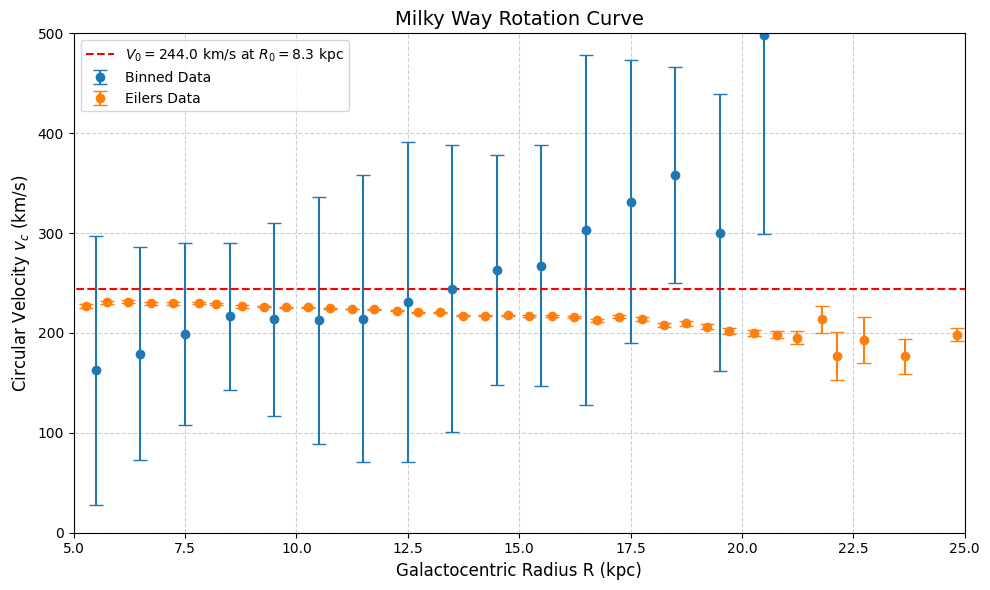


Analysis finished successfully.


In [1]:
# %% Imports
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Scientific libraries
from scipy.optimize import curve_fit
from scipy.stats import binned_statistic
from scipy.interpolate import CubicSpline

# Astropy for coordinate transformations and statistics
try:
    from astropy.coordinates import SkyCoord
    import astropy.units as u
    from astropy.stats import sigma_clip
except ImportError:
    print("Warning: Astropy package not found. Please install it: pip install astropy")
    # Define dummy classes/functions if astropy is missing to avoid runtime errors on import
    # This won'g work in practice, but allows code structure validation.
    class SkyCoord: pass
    class u: pass


# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# %% Constants
# Solar motion parameters (e.g., Schönrich et al. 2010 or Reid et al. 2019)
U_sun, V_sun, W_sun = 11.1, 12.24, 7.25  # km/s
# Galactic parameters (e.g., GRAVITY collaboration 2019, Reid et al. 2019)
V0, R0 = 244.0, 8.3  # km/s, kpc
z_sun = 0.020  # kpc

# %% Rotation Curve Analyzer Class

class RotationCurveAnalyzer:
    """
    Analyzes stellar catalog data to derive the Galactic rotation curve.

    Implements optimized data processing steps:
    1.  Vectorized data loading and filtering.
    2.  Astropy-based coordinate transformation.
    3.  Robust kinematic calculations.
    4.  Efficient binning using scipy.stats.binned_statistic.
    """
    def __init__(self, catalog_path):
        """
        Initialize the analyzer by loading and preparing catalog data.

        Args:
            catalog_path (str): Path to the input CSV catalog file.
        """
        print(f"Loading data from {catalog_path}...")
        self.df = pd.read_csv(catalog_path)
        print(f"Loaded {len(self.df)} initial records.")
        self.validate_data()
        self.prepare_data()

    def validate_data(self):
        """Validate required columns exist in the DataFrame."""
        required_cols = ['ra', 'dec', 'VRAD', 'VRAD_ERR', 'Rgal', 'DIST', 'DISTERR', 'XYZ']
        missing_cols = [col for col in required_cols if col not in self.df.columns]
        if missing_cols:
            raise ValueError(f"Missing required columns: {missing_cols}")

    def optimize_memory(self):
        """Downcast float64 columns to float32 to save memory."""
        print("\nOptimizing memory usage...")
        initial_memory = self.df.memory_usage(deep=True).sum() / 1024**2
        for col in self.df.select_dtypes(include=['float64']).columns:
            self.df[col] = self.df[col].astype(np.float32)
        final_memory = self.df.memory_usage(deep=True).sum() / 1024**2
        print(f"Memory usage reduced from {initial_memory:.2f} MB to {final_memory:.2f} MB.")

    # --- Data Filtering Methods ---

    def apply_spatial_cut_z(self, z_max=2.0):
        """
        Applies a spatial cut for |z| < z_max kpc using vectorized operations.
        Assumes 'XYZ' column format like '(x_val, y_val, z_val)'.
        """
        print(f"\nApplying spatial cut: |z| < {z_max} kpc...")
        initial_size = len(self.df)

        # Vectorized string parsing: significantly faster than df.apply()
        # 1. Access string methods with .str
        # 2. Strip parentheses from start/end: .str.strip('()')
        # 3. Split by comma: .str.split(',')
        # 4. Extract z value (index 2): .str[2]
        # 5. Convert to numeric, setting errors as NaN: pd.to_numeric()
        try:
            z_values = pd.to_numeric(
                self.df['XYZ'].str.strip('()').str.split(',').str[2],
                errors='coerce'
            )
        except AttributeError:
             print("Error parsing 'XYZ' column. Ensure it's a string. Skipping z-cut.")
             return

        # Apply filter. Boolean comparisons with NaN automatically evaluate to False.
        self.df = self.df[np.abs(z_values) < z_max].copy()
        removed_count = initial_size - len(self.df)
        print(f"Data size after z-cut: {len(self.df)} objects")
        print(f"Removed: {removed_count} objects due to z-cut or parsing errors.")

    def apply_distance_quality_cuts(self, relative_error_threshold=0.5):
        """Apply a distance quality cut based on relative error."""
        print(f"\nApplying distance quality cut: |DISTERR/DIST| < {relative_error_threshold}...")
        initial_size = len(self.df)

        # Avoid division by zero by replacing 0 distance with NaN temporarily
        dist_safe = self.df['DIST'].replace(0, np.nan)
        relative_dist_error = np.abs(self.df['DISTERR'] / dist_safe)

        # Apply cut
        self.df = self.df[relative_dist_error < relative_error_threshold].copy()
        removed_count = initial_size - len(self.df)
        print(f"Data size after distance cut: {len(self.df)} objects")
        print(f"Removed: {removed_count} objects.")

    def apply_velocity_quality_cuts(self, relative_error_threshold=0.5, abs_vrad_limit=500.0):
        """Apply velocity quality cuts based on relative error and absolute magnitude."""
        print(f"\nApplying velocity quality cuts: |VRAD_ERR/VRAD| < {relative_error_threshold} and |VRAD| < {abs_vrad_limit} km/s...")
        initial_size = len(self.df)

        # Avoid division by zero in relative error calculation
        vrad_safe = self.df['VRAD'].replace(0, np.nan)
        relative_error = np.abs(self.df['VRAD_ERR'] / vrad_safe)

        # Define masks for clarity
        relative_error_mask = relative_error < relative_error_threshold
        absolute_velocity_mask = np.abs(self.df['VRAD']) < abs_vrad_limit

        # Apply both cuts simultaneously
        self.df = self.df[relative_error_mask & absolute_velocity_mask].copy()
        removed_count = initial_size - len(self.df)
        print(f"Data size after velocity cuts: {len(self.df)} objects")
        print(f"Removed: {removed_count} objects.")

    def apply_sin_l_cut(self, min_sin_l_abs=0.1):
        """
        Applies a cut on |sin(l)| to avoid singularities in Vc calculation.
        A value of 0.1 corresponds to excluding ~5.7 degrees from l=0 and l=180.
        """
        print(f"\nApplying singularity cut: |sin(l)| > {min_sin_l_abs}...")
        initial_size = len(self.df)
        l_rad = np.radians(self.df['l'])
        mask = np.abs(np.sin(l_rad)) > min_sin_l_abs

        self.df = self.df[mask].copy()
        removed_count = initial_size - len(self.df)
        print(f"Removed {removed_count} stars near l=0/180. Remaining: {len(self.df)}")

    # --- Coordinate and Kinematic Calculations ---

    def convert_coordinates_astropy(self):
        """Converts RA/Dec to Galactic coordinates using Astropy for accuracy."""
        print("\nConverting coordinates using Astropy (ICRS -> Galactic)...")
        if 'ra' not in self.df.columns or 'dec' not in self.df.columns:
            print("RA/Dec columns not found for conversion.")
            return

        # Create SkyCoord object from DataFrame columns
        coords = SkyCoord(ra=self.df['ra'].values * u.degree,
                          dec=self.df['dec'].values * u.degree,
                          frame='icrs')

        # Perform transformation to Galactic coordinates
        galactic_coords = coords.galactic

        # Assign new columns back to DataFrame
        self.df['l'] = galactic_coords.l.degree
        self.df['b'] = galactic_coords.b.degree
        print("Galactic coordinates 'l' and 'b' calculated and added.")

    def prepare_data(self):
        """Clean and prepare data by applying filters and calculating coordinates."""
        # Ensure essential columns for cuts don't have NaN values before filtering
        essential_cols = ['ra', 'dec', 'VRAD', 'VRAD_ERR', 'Rgal', 'XYZ', 'DIST', 'DISTERR']
        self.df.dropna(subset=essential_cols, inplace=True)

        # Apply filtering sequence
        self.apply_spatial_cut_z(z_max=2.0)
        self.apply_distance_quality_cuts()
        self.apply_velocity_quality_cuts()

        # Convert to galactic coordinates after filtering
        self.convert_coordinates_astropy()

        # Optimize memory after major operations and column additions
        self.optimize_memory()
        print(f"\nData preparation complete. Final working set size: {len(self.df)} objects")

    def calculate_v_lsr(self):
        """Calculate velocity relative to the Local Standard of Rest (LSR)."""
        l_rad = np.radians(self.df['l'])
        b_rad = np.radians(self.df['b'])

        # v_LSR = v_h + U_sun*cos(b)*cos(l) + V_sun*cos(b)*sin(l) + W_sun*sin(b)
        v_lsr = (self.df['VRAD'] +
                 U_sun * np.cos(b_rad) * np.cos(l_rad) +
                 V_sun * np.cos(b_rad) * np.sin(l_rad) +
                 W_sun * np.sin(b_rad))

        return v_lsr.values

    def calculate_circular_velocity(self, v_lsr):
        """Calculate circular velocity assuming simple circular motion model."""
        # Calculate Galactocentric radius R if not present or for verification
        r_h = self.df['DIST']
        l_rad = np.radians(self.df['l'])
        b_rad = np.radians(self.df['b'])
        cos_b = np.cos(b_rad)
        R = np.sqrt(R0**2 + (r_h * cos_b)**2 - 2 * R0 * (r_h * cos_b) * np.cos(l_rad))
        self.df['R'] = R # Store calculated R

        # v_c = R/R0 * ((v_lsr / (sin(l) * cos(b))) + V0)
        v_c = R / R0 * ((v_lsr / (np.sin(l_rad) * cos_b)) + V0)
        return v_c

    # --- Analysis and Binning ---

    def robust_sigma(self, data):
        """Robust dispersion estimator using bi-weight scale."""
        data = np.array(data, dtype=float).ravel()
        n_points = len(data)
        if n_points == 0:
            return np.nan

        # Calculate median and Median Absolute Deviation (MAD)
        median = np.median(data)
        mad = np.median(np.abs(data - median))

        # Fallback for low dispersion or small numbers
        if mad < 1e-20:
            if n_points < 2: return 0.0
            mad = np.mean(np.abs(data - median)) / 0.8 # Use mean absolute deviation

        # Bi-weight calculation parameters
        c = 6.0 # Tuning constant for 95% efficiency
        u = (data - median) / (c * mad)
        mask = np.abs(u) <= 1.0

        if np.sum(mask) < 3:
            return np.std(data)  # fallback to standard deviation

        u2 = u[mask]**2
        data_core = data[mask]

        numerator = np.sum((data_core - median)**2 * (1 - u2)**4)
        denominator = np.sum((1 - u2) * (1 - 5.0 * u2))

        if denominator <= 0:
            return np.std(data)

        sigma_biweight = np.sqrt(n_points * numerator / (denominator * (denominator - 1)))
        return sigma_biweight

    def radial_binning_of_Vc(self, v_c, R_values, R_max=25.0, n_bins=25, min_count_per_bin=20):
        """
        Perform optimized radial binning of circular velocity using scipy.stats.binned_statistic.

        Args:
            v_c (np.array): Array of circular velocities.
            R_values (np.array): Array of corresponding Galactocentric radii.
            R_max (float): Maximum radius for binning.
            n_bins (int): Number of bins to create up to R_max.
            min_count_per_bin (int): Minimum number of data points required in a bin.

        Returns:
            tuple: (bin_centres, mean_velocities, errors)
        """
        print(f"\nBinning data into {n_bins} bins up to R={R_max} kpc...")
        bins = np.linspace(0, R_max, n_bins + 1)

        # 1. Calculate mean velocity per bin
        mean_stat = binned_statistic(
            R_values, v_c, statistic='mean', bins=bins
        )

        # 2. Calculate robust dispersion per bin using the custom function
        error_stat = binned_statistic(
            R_values, v_c, statistic=self.robust_sigma, bins=bins
        )

        # 3. Get counts per bin to filter sparse bins
        counts = np.histogram(R_values, bins=bins)[0]

        # 4. Prepare output arrays, applying minimum count filter
        bin_centres = (bins[:-1] + bins[1:]) / 2
        min_count_mask = counts > min_count_per_bin

        mean_velocities = np.where(min_count_mask, mean_stat.statistic, np.nan)
        errors = np.where(min_count_mask, error_stat.statistic, np.nan)

        print(f"Binning complete. {np.sum(min_count_mask)} bins meet minimum count threshold ({min_count_per_bin}).")
        return bin_centres, mean_velocities, errors

    # --- Main Execution Pipeline ---

    def main_run(self, R_min=5.0, R_max=25.0):
        """
        Execute the full analysis pipeline: calculation, binning, and plotting.

        Args:
            R_min (float): Minimum Galactocentric radius for analysis.
            R_max (float): Maximum Galactocentric radius for analysis.
        """
        # Apply robustness cut for Vc calculation
        self.apply_sin_l_cut()

        # Calculate kinematics
        print("\nCalculating kinematics...")
        v_lsr = self.calculate_v_lsr()
        v_c = self.calculate_circular_velocity(v_lsr)

        # Filter data for final analysis range and remove NaNs from calculation
        mask = (self.df['R'] >= R_min) & (self.df['R'] <= R_max) & ~np.isnan(v_c)
        R_clean = self.df['R'][mask]
        v_c_clean = v_c[mask]
        print(f"Analyzing {len(R_clean)} stars within R range [{R_min}, {R_max}] kpc.")

        # Perform binning
        bin_centres, mean_velocities, errors = self.radial_binning_of_Vc(
            v_c_clean, R_clean, R_max=R_max, n_bins=int(R_max) # e.g., 1 kpc bins by default
        )

        df_eil = pd.read_csv('Eilers_data.csv')
        # Plotting the Rotation Curve
        print("\nGenerating plot...")
        plt.figure(figsize=(10, 6))
        plt.errorbar(bin_centres, mean_velocities, yerr=errors, fmt='o', capsize=5, label='Binned Data')
        plt.errorbar(df_eil['R'], df_eil['Vc'], yerr=df_eil['Vc_err'], fmt='o', capsize=5, label='Eilers Data')
        plt.xlabel('Galactocentric Radius R (kpc)', fontsize=12)
        plt.ylabel('Circular Velocity $v_c$ (km/s)', fontsize=12)
        plt.title('Milky Way Rotation Curve', fontsize=14)
        plt.hlines(V0, 0, R_max, colors='r', linestyles='dashed', label=f'$V_0 = {V0}$ km/s at $R_0 = {R0}$ kpc')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.xlim(5, R_max)
        plt.ylim(0, 500)
        plt.tight_layout()
        plt.show()

        return bin_centres, mean_velocities, errors

# %% Usage Example

def main(catalog_path):
    """Main function to run the analysis."""
    try:
        analyzer = RotationCurveAnalyzer(catalog_path)
        results = analyzer.main_run()
        print("\nAnalysis finished successfully.")
        return analyzer, results
    except Exception as e:
        print(f"\nAn error occurred during analysis: {e}")
        import traceback
        traceback.print_exc()
        return None, None

pd.read_csv('FINAL_COMPLETE_2_CSV.csv')
analyzer, results = main('FINAL_COMPLETE_2_CSV.csv')

Loading data from FINAL_COMPLETE_2_CSV.csv...
Loaded 4198765 initial records.

Applying spatial cut: |z| < 0.5 kpc...
Data size after z-cut: 546706 objects
Removed: 3388265 objects due to z-cut or parsing errors.

Applying distance quality cut: |DISTERR/DIST| < 0.5...
Data size after distance cut: 537354 objects
Removed: 9352 objects.

Applying velocity quality cuts: |VRAD_ERR/VRAD| < 0.5 and |VRAD| < 500.0 km/s...
Data size after velocity cuts: 512179 objects
Removed: 25175 objects.

Converting coordinates using Astropy (ICRS -> Galactic)...
Galactic coordinates 'l' and 'b' calculated and added.

Optimizing memory usage...
Memory usage reduced from 355.06 MB to 231.97 MB.

Data preparation complete. Final working set size: 512179 objects

Applying singularity cut: |sin(l)| > 0.1...
Removed 26825 stars near l=0/180. Remaining: 485354

Calculating kinematics...
Analyzing 485274 stars within R range [5.0, 25.0] kpc.

Binning data into 25 bins up to R=25.0 kpc...
Binning complete. 8 bins 

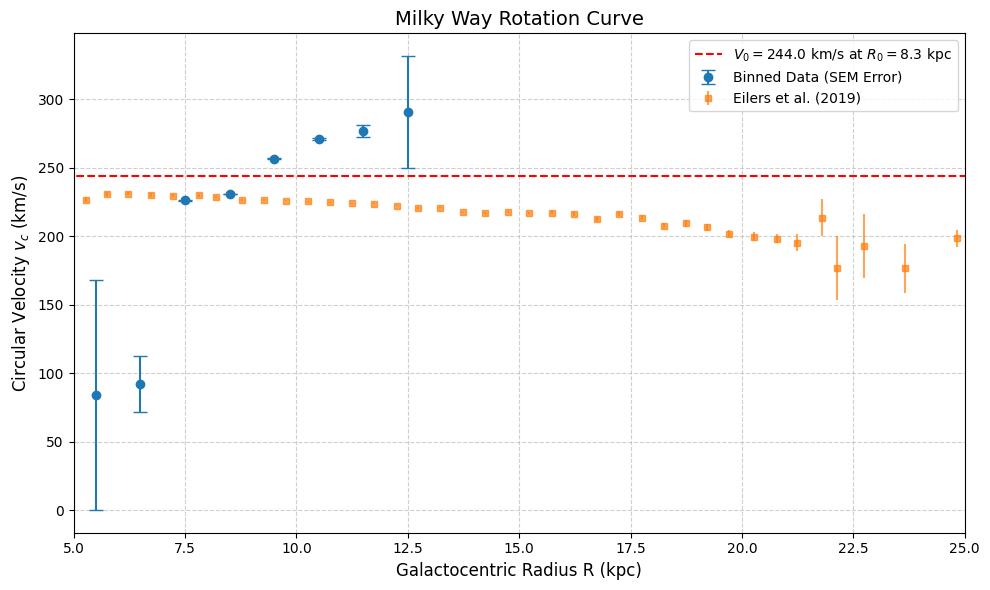


Analysis finished successfully.


In [ ]:
# %% Imports
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Scientific libraries
from scipy.optimize import curve_fit
from scipy.stats import binned_statistic
from scipy.interpolate import CubicSpline

# Astropy for coordinate transformations and statistics
try:
    from astropy.coordinates import SkyCoord
    import astropy.units as u
    from astropy.stats import sigma_clip
except ImportError:
    print("Warning: Astropy package not found. Please install it: pip install astropy")
    # Define dummy classes/functions if astropy is missing to avoid runtime errors on import
    # This won'g work in practice, but allows code structure validation.
    class SkyCoord: pass
    class u: pass


# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# %% Constants
# Solar motion parameters (e.g., Schönrich et al. 2010 or Reid et al. 2019)
U_sun, V_sun, W_sun = 11.1, 12.24, 7.25  # km/s
# Galactic parameters (e.g., GRAVITY collaboration 2019, Reid et al. 2019)
V0, R0 = 244.0, 8.3  # km/s, kpc
z_sun = 0.020  # kpc


# %% Rotation Curve Analyzer Class

class RotationCurveAnalyzer:
    """
    Analyzes stellar catalog data to derive the Galactic rotation curve.

    Implements optimized data processing steps:
    1.  Vectorized data loading and filtering.
    2.  Astropy-based coordinate transformation.
    3.  Robust kinematic calculations.
    4.  Efficient binning using scipy.stats.binned_statistic.
    """
    def __init__(self, catalog_path):
        """
        Initialize the analyzer by loading and preparing catalog data.

        Args:
            catalog_path (str): Path to the input CSV catalog file.
        """
        print(f"Loading data from {catalog_path}...")
        self.df = pd.read_csv(catalog_path)
        print(f"Loaded {len(self.df)} initial records.")
        self.validate_data()
        self.prepare_data()

    def validate_data(self):
        """Validate required columns exist in the DataFrame."""
        required_cols = ['ra', 'dec', 'VRAD', 'VRAD_ERR', 'Rgal', 'DIST', 'DISTERR', 'XYZ']
        missing_cols = [col for col in required_cols if col not in self.df.columns]
        if missing_cols:
            raise ValueError(f"Missing required columns: {missing_cols}")

    def optimize_memory(self):
        """Downcast float64 columns to float32 to save memory."""
        print("\nOptimizing memory usage...")
        initial_memory = self.df.memory_usage(deep=True).sum() / 1024**2
        for col in self.df.select_dtypes(include=['float64']).columns:
            self.df[col] = self.df[col].astype(np.float32)
        final_memory = self.df.memory_usage(deep=True).sum() / 1024**2
        print(f"Memory usage reduced from {initial_memory:.2f} MB to {final_memory:.2f} MB.")

    # --- Data Filtering Methods ---

    def apply_spatial_cut_z(self, z_max=2.0):
        """
        Applies a spatial cut for |z| < z_max kpc using vectorized operations.
        Assumes 'XYZ' column format like '(x_val, y_val, z_val)'.
        """
        print(f"\nApplying spatial cut: |z| < {z_max} kpc...")
        initial_size = len(self.df)

        try:
            z_values = pd.to_numeric(
                self.df['XYZ'].str.strip('()').str.split(',').str[2],
                errors='coerce'
            )
        except AttributeError:
             print("Error parsing 'XYZ' column. Ensure it's a string. Skipping z-cut.")
             return

        self.df = self.df[np.abs(z_values) < z_max].copy()
        removed_count = initial_size - len(self.df)
        print(f"Data size after z-cut: {len(self.df)} objects")
        print(f"Removed: {removed_count} objects due to z-cut or parsing errors.")

    def apply_distance_quality_cuts(self, relative_error_threshold=0.5):
        """Apply a distance quality cut based on relative error."""
        print(f"\nApplying distance quality cut: |DISTERR/DIST| < {relative_error_threshold}...")
        initial_size = len(self.df)
        dist_safe = self.df['DIST'].replace(0, np.nan)
        relative_dist_error = np.abs(self.df['DISTERR'] / dist_safe)
        self.df = self.df[relative_dist_error < relative_error_threshold].copy()
        removed_count = initial_size - len(self.df)
        print(f"Data size after distance cut: {len(self.df)} objects")
        print(f"Removed: {removed_count} objects.")

    def apply_velocity_quality_cuts(self, relative_error_threshold=0.5, abs_vrad_limit=500.0):
        """Apply velocity quality cuts based on relative error and absolute magnitude."""
        print(f"\nApplying velocity quality cuts: |VRAD_ERR/VRAD| < {relative_error_threshold} and |VRAD| < {abs_vrad_limit} km/s...")
        initial_size = len(self.df)
        vrad_safe = self.df['VRAD'].replace(0, np.nan)
        relative_error = np.abs(self.df['VRAD_ERR'] / vrad_safe)
        relative_error_mask = relative_error < relative_error_threshold
        absolute_velocity_mask = np.abs(self.df['VRAD']) < abs_vrad_limit
        self.df = self.df[relative_error_mask & absolute_velocity_mask].copy()
        removed_count = initial_size - len(self.df)
        print(f"Data size after velocity cuts: {len(self.df)} objects")
        print(f"Removed: {removed_count} objects.")

    def apply_sin_l_cut(self, min_sin_l_abs=0.1):
        """Applies a cut on |sin(l)| to avoid singularities in Vc calculation."""
        print(f"\nApplying singularity cut: |sin(l)| > {min_sin_l_abs}...")
        initial_size = len(self.df)
        l_rad = np.radians(self.df['l'])
        mask = np.abs(np.sin(l_rad)) > min_sin_l_abs
        self.df = self.df[mask].copy()
        removed_count = initial_size - len(self.df)
        print(f"Removed {removed_count} stars near l=0/180. Remaining: {len(self.df)}")

    # --- Coordinate and Kinematic Calculations ---

    def convert_coordinates_astropy(self):
        """Converts RA/Dec to Galactic coordinates using Astropy for accuracy."""
        print("\nConverting coordinates using Astropy (ICRS -> Galactic)...")
        if 'ra' not in self.df.columns or 'dec' not in self.df.columns:
            print("RA/Dec columns not found for conversion.")
            return

        coords = SkyCoord(ra=self.df['ra'].values * u.degree,
                          dec=self.df['dec'].values * u.degree,
                          frame='icrs')
        galactic_coords = coords.galactic
        self.df['l'] = galactic_coords.l.degree
        self.df['b'] = galactic_coords.b.degree
        print("Galactic coordinates 'l' and 'b' calculated and added.")

    def prepare_data(self):
        """Clean and prepare data by applying filters and calculating coordinates."""
        essential_cols = ['ra', 'dec', 'VRAD', 'VRAD_ERR', 'Rgal', 'XYZ', 'DIST', 'DISTERR']
        self.df.dropna(subset=essential_cols, inplace=True)
        self.apply_spatial_cut_z(z_max=5.0)
        self.apply_distance_quality_cuts()
        self.apply_velocity_quality_cuts()
        self.convert_coordinates_astropy()
        self.optimize_memory()
        print(f"\nData preparation complete. Final working set size: {len(self.df)} objects")

    def calculate_v_lsr(self):
        """Calculate velocity relative to the Local Standard of Rest (LSR)."""
        l_rad = np.radians(self.df['l'])
        b_rad = np.radians(self.df['b'])
        v_lsr = (self.df['VRAD'] +
                 U_sun * np.cos(b_rad) * np.cos(l_rad) +
                 V_sun * np.cos(b_rad) * np.sin(l_rad) +
                 W_sun * np.sin(b_rad))
        return v_lsr.values

    def calculate_circular_velocity(self, v_lsr):
        """Calculate circular velocity assuming simple circular motion model."""
        r_h = self.df['DIST']
        l_rad = np.radians(self.df['l'])
        b_rad = np.radians(self.df['b'])
        cos_b = np.cos(b_rad)
        R = np.sqrt(R0**2 + (r_h * cos_b)**2 - 2 * R0 * (r_h * cos_b) * np.cos(l_rad))
        self.df['R'] = R
        v_c = R / R0 * ((v_lsr / (np.sin(l_rad) * cos_b)) + V0)
        return v_c

    # --- Analysis and Binning ---

    def robust_sigma(self, data):
        """Robust dispersion estimator using bi-weight scale."""
        data = np.array(data, dtype=float).ravel()
        n_points = len(data)
        if n_points == 0:
            return np.nan

        median = np.median(data)
        mad = np.median(np.abs(data - median))

        if mad < 1e-20:
            if n_points < 2: return 0.0
            mad = np.mean(np.abs(data - median)) / 0.8

        c = 6.0
        u = (data - median) / (c * mad)
        mask = np.abs(u) <= 1.0

        if np.sum(mask) < 3:
            return np.std(data)

        u2 = u[mask]**2
        data_core = data[mask]
        numerator = np.sum((data_core - median)**2 * (1 - u2)**4)
        denominator = np.sum((1 - u2) * (1 - 5.0 * u2))

        if denominator <= 0:
            return np.std(data)

        sigma_biweight = np.sqrt(n_points * numerator / (denominator * (denominator - 1)))
        return sigma_biweight

    def radial_binning_of_Vc(self, v_c, R_values, R_max=25.0, n_bins=25, min_count_per_bin=20):
        """
        Perform optimized radial binning of circular velocity using scipy.stats.binned_statistic.

        Calculates the standard error of the mean (sigma / sqrt(N)) for each bin.

        Args:
            v_c (np.array): Array of circular velocities.
            R_values (np.array): Array of corresponding Galactocentric radii.
            R_max (float): Maximum radius for binning.
            n_bins (int): Number of bins to create up to R_max.
            min_count_per_bin (int): Minimum number of data points required in a bin.

        Returns:
            tuple: (bin_centres, mean_velocities, errors_on_mean)
        """
        print(f"\nBinning data into {n_bins} bins up to R={R_max} kpc...")
        bins = np.linspace(0, R_max, n_bins + 1)

        # 1. Calculate mean velocity per bin
        mean_stat = binned_statistic(
            R_values, v_c, statistic='mean', bins=bins
        )

        # 2. Calculate robust velocity dispersion (sigma_bin) per bin
        dispersion_stat = binned_statistic(
            R_values, v_c, statistic=self.robust_sigma, bins=bins
        )

        # 3. Get counts per bin (N)
        counts = np.histogram(R_values, bins=bins)[0]

        # 4. Prepare output arrays, applying minimum count filter
        bin_centres = (bins[:-1] + bins[1:]) / 2
        min_count_mask = counts > min_count_per_bin

        mean_velocities = np.where(min_count_mask, mean_stat.statistic, np.nan)

        # 5. Calculate Standard Error of the Mean (SEM = sigma / sqrt(N))
        # This incorporates the Poissonian uncertainty from finite counts.
        # Use np.errstate to suppress warnings for division by zero in empty bins (which are masked out anyway).
        with np.errstate(divide='ignore', invalid='ignore'):
            standard_error_of_mean = dispersion_stat.statistic / np.sqrt(counts)

        errors_on_mean = np.where(min_count_mask, standard_error_of_mean, np.nan)

        print(f"Binning complete. {np.sum(min_count_mask)} bins meet minimum count threshold ({min_count_per_bin}).")
        return bin_centres, mean_velocities, errors_on_mean

    # --- Main Execution Pipeline ---

    def main_run(self, R_min=5.0, R_max=25.0):
        """Execute the full analysis pipeline: calculation, binning, and plotting."""
        self.apply_sin_l_cut()
        print("\nCalculating kinematics...")
        v_lsr = self.calculate_v_lsr()
        v_c = self.calculate_circular_velocity(v_lsr)

        mask = (self.df['R'] >= R_min) & (self.df['R'] <= R_max) & ~np.isnan(v_c)
        R_clean = self.df['R'][mask]
        v_c_clean = v_c[mask]
        print(f"Analyzing {len(R_clean)} stars within R range [{R_min}, {R_max}] kpc.")

        bin_centres, mean_velocities, errors = self.radial_binning_of_Vc(
            v_c_clean, R_clean, R_max=R_max, n_bins=int(R_max), min_count_per_bin=20
        )

        # Load comparison data (ensure 'Eilers_data.csv' exists)
        try:
            df_eil = pd.read_csv('Eilers_data.csv')
            plot_comparison = True
        except FileNotFoundError:
            print("Warning: 'Eilers_data.csv' not found. Skipping comparison plot.")
            plot_comparison = False

        # Plotting the Rotation Curve
        print("\nGenerating plot...")
        plt.figure(figsize=(10, 6))
        plt.errorbar(bin_centres, mean_velocities, yerr=errors, fmt='o', capsize=5, label='Binned Data (SEM Error)')
        if plot_comparison:
            plt.errorbar(df_eil['R'], df_eil['Vc'], yerr=df_eil['Vc_err'], fmt='s', markersize=4, alpha=0.7, label='Eilers et al. (2019)')

        plt.xlabel('Galactocentric Radius R (kpc)', fontsize=12)
        plt.ylabel('Circular Velocity $v_c$ (km/s)', fontsize=12)
        plt.title('Milky Way Rotation Curve', fontsize=14)
        plt.hlines(V0, 0, R_max, colors='r', linestyles='dashed', label=f'$V_0 = {V0}$ km/s at $R_0 = {R0}$ kpc')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.xlim(R_min, R_max)
        #plt.ylim(0, 500)
        plt.tight_layout()
        plt.show()

        return bin_centres, mean_velocities, errors

def main(catalog_path):
    """Main function to run the analysis."""
    try:
        analyzer = RotationCurveAnalyzer(catalog_path)
        results = analyzer.main_run()
        print("\nAnalysis finished successfully.")
        return analyzer, results
    except Exception as e:
        print(f"\nAn error occurred during analysis: {e}")
        import traceback
        traceback.print_exc()
        return None, None

pd.read_csv('FINAL_COMPLETE_2_CSV.csv')
analyzer, results = main('FINAL_COMPLETE_2_CSV.csv')